In [121]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import os

from astropy.io import fits
from astropy.table import Table
from astropy.wcs import WCS
from psf_tools import run_hst1pass, align_images, make_final_table
from scipy.stats import binned_statistic

from photometry_tools import phot_wrapper

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [191]:
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 10
plt.rcParams.update({'axes.titlesize' : '18',
                     'axes.labelsize' : '14',
                     'xtick.labelsize' : '14',
                     'ytick.labelsize' : '14'})
%matplotlib inline

### Get the list of images

In [8]:
cd ../n44

/Users/vbajaj/Documents/wfc3_photometry/wfc3_photometry/n44


In [59]:
input_images = sorted(glob.glob('*flc.fits'))

In [60]:
for im in input_images:
    print(im)

id7307xfq_flc.fits
id7307xhq_flc.fits
id7307xlq_flc.fits
id7307xpq_flc.fits
id7307xtq_flc.fits
id7307xwq_flc.fits
id7307y0q_flc.fits
id7307y4q_flc.fits
id7319lbq_flc.fits
id7319lfq_flc.fits
id7319ljq_flc.fits
id7319mbq_flc.fits
id7319meq_flc.fits
id7319miq_flc.fits


### See input options:

In [131]:
run_hst1pass?

In [61]:
run_hst1pass(input_images=input_images, hmin=4, fmin=500., pmax=72000., executable_path='../psf_tools/hst1pass.e')

../psf_tools/hst1pass.e HMIN=4 FMIN=500.0 PMAX=72000.0 OUT=xympqk  id7307xfq_flc.fits id7307xhq_flc.fits id7307xlq_flc.fits id7307xpq_flc.fits id7307xtq_flc.fits id7307xwq_flc.fits id7307y0q_flc.fits id7307y4q_flc.fits id7319lbq_flc.fits id7319lfq_flc.fits id7319ljq_flc.fits id7319mbq_flc.fits id7319meq_flc.fits id7319miq_flc.fits


ARG0000  ../psf_tools/hst1pass.e
ARG0001  HMIN=4
ARG0002  FMIN=500.0
ARG0003  PMAX=72000.0
ARG0004  OUT=xympqk
--->    NLISTs =            1
--->    NITEMs =            6
--->   OUTLIST = xympqk
ARG0005  id7307xfq_flc.fits
---> NIM0001 id7307xfq_flc.fits
ARG0006  id7307xhq_flc.fits
---> NIM0002 id7307xhq_flc.fits
ARG0007  id7307xlq_flc.fits
---> NIM0003 id7307xlq_flc.fits
ARG0008  id7307xpq_flc.fits
---> NIM0004 id7307xpq_flc.fits
ARG0009  id7307xtq_flc.fits
---> NIM0005 id7307xtq_flc.fits
ARG0010  id7307xwq_flc.fits
---> NIM0006 id7307xwq_flc.fits
ARG0011  id7307y0q_flc.fits
---> NIM0007 id7307y0q_flc.fits
ARG0012  id7307y4q_flc.fits
---> NIM0008 id7307y4q

70 3218.684   26.623  -9.177   34.3|5 5 8|   1093|   132  1090    59   670|    51    47   114   232|      34    3086    2943
80 2417.416   32.211  -9.251   48.5|5 6 9|    847|   757   201   544   280|   472   148   246   104|      48    2622    2452
90 2363.912   36.865 -11.248   42.8|51013|   5533|  2161  2930  1902  2934|   747  1063  1312  1511|      42   12908   12694
100 1556.463   39.348  -9.919   38.3|5 710|   1904|  1189   240   795   279|  1468   173   219   115|      38    5357    5180
150 1835.410   52.861  -7.725   38.0|5 5 8|    212|   195    89   113   137|    88    57   138    69|      38     682     530
200 2875.234   63.061  -8.533   44.6|5 5 8|    455|   363   185   264   212|   162   140   175    88|      44    1245    1064
250 2163.948   75.415  -9.524   38.8|5 710|   1054|   474   523   918   255|   384   464   153   157|      38    2960    2791
300  763.798   89.489 -10.477   37.2|5 912|   2976|   575   950   275  2792|   102   172   467  2649|      37    9367    

5400 2419.949 1317.748  -8.879   34.6|5 5 8|    882|   100   130   828   460|    42    34   100   154|      34    1875    1732
5500 2038.271 1342.302 -10.268   35.4|5 912|   2496|   794  1976   358    94|   884    76    38    32|      35    4908    4769
5600 2201.895 1365.779 -11.389   38.6|51013|   5824|  2376  3327  1800  3895|   721  1172  1556  1882|      38   14929   14724
5700 3531.946 1386.162  -7.750   28.0|5 5 8|    227|   111   131   168   133|    86    87    49    65|      27     614     500
5800  527.209 1406.656  -7.766   68.2|5 3 6|    263|   173   137   118   229|   110    87   181   105|      68     846     602
5900 3137.721 1426.751  -9.450   26.6|5 710|   1458|    67   305  1314   790|    19    52    49   348|      26    3130    3026
6000  482.924 1446.657  -8.390   48.9|5 5 8|    420|   179   261   142   285|    86    81   186   187|      48    1154     955
6100 1015.607 1468.321  -7.955  100.4|5 3 6|    303|   171   234   201   151|   146   254   175   147|     100 

12000  685.441 2674.034  -9.964   96.9|5 5 8|   1725|  1314   204   532  1513|   950   219   423   158|      96    4976    4571
12100 2652.909 2694.951 -10.011   28.5|5 5 8|   1659|   693   919   765   901|   335   450   393   470|      28    3951    3817
12200  374.604 2714.659  -9.562   77.4|5 5 8|   1176|   366  1172   160   674|   130   128   229   447|      77    3472    3148
12300 2669.100 2732.548  -9.934   23.4|5 710|   1682|   282   496   959   169|  1602   343    75    88|      23    4527    4419
12400 2921.697 2751.671  -7.951   23.4|5 5 8|    200|    99   187   128   194|    40    56    58   142|      23     725     609
12500 2510.292 2771.595  -8.186   23.5|5 5 8|    285|   184   117    79   230|    75    73   218    81|      23     918     816
12600 2318.453 2792.852  -8.144   30.5|5 5 8|    310|    84   281    84   169|    49   154    59   158|      30     920     795
12700 1846.000 2813.000 -17.591  554.2|9 0 0|*******| 70623 71544 72483 71943| 71924 72030 71048 71614| 

18500 2904.595 3923.626  -9.878   23.5|5 811|   1705|   268  1609   162  1187|    66   135   221   725|      23    5228    5113
18600 1363.670 3949.908  -9.219   44.9|5 6 9|   1062|   996    75   109   407|   272    46   211   284|      44    2677    2495
18700 1119.943 3969.987  -9.416  157.5|5 4 7|    915|   570   594   580   619|   355   471   407   413|     157    2562    1933
18800 3438.048 4000.315  -8.357   28.5|5 4 7|    398|   196   154   290   136|   155   143    74    88|      28    1040     927
18900 3525.643 4023.869  -7.710   26.7|5 5 8|    193|    72   180   104   148|    41    91    73   103|      26     626     503
19000  162.293 4046.717  -8.395   52.0|5 5 8|    370|   261   158   162   255|   142    99   266   125|      51    1153     951
19100   31.648 4075.470  -9.510   69.4|5 6 9|    912|   296   686   791   272|   272   665   166   202|      69    3055    2779
------- -------- -------- ------- ------|- - -|-------| ----- ----- ----- -----| ----- ----- ----- -----

1249 2143   -14.6516    39.35       725516.9        0       25 00100   0.802813       686211.4     686211.4
2311 0411   -18.8059   245.73     33292304.0      375      935 00146   1.040982     18677784.0   18677784.0
3366 3036   -19.4536   445.65     60454336.0      801     1983 00195   1.046507     30044372.0   30044372.0
3422 0197   -15.3359    28.73      1362625.9        9       57 00200   0.969521      1385032.2    1385032.2

INSTRUMENT: 'WFC3  '
DETECTOR: 'UVIS'

pixc(500,500):    34.2536316
CRPIX1_INST: 2048.00000001026.0000000
CRPIX1_xgc0: 2047.92864001225.6323200
CRVAL1_INST:   80.5138162 -67.9318777
CD1_1_INST:    0.0000104   0.0000037
CD2_1_INST:    0.0000037  -0.0000104
LOFLAG_INST:      -50
HIFLAG_INST:    65000
BDRY_XR(1,1):    1.0000000   1.0000000
BDRY_XR(2,1): 4095.0000000   1.0000000
BDRY_XR(3,1): 4095.00000002047.0000000
BDRY_XR(4,1):    1.00000002047.0000000
FILT_INST: F814W
EXPT_INST:    697.00
RDAT_INST:   2017.76
PROP_INST: 14689
RA2SEXIG:   80.513816205:22:03.3
DE

1400 2294.681  433.666  -8.364  185.7|5 2 5|    696|   224   274   199   260|   172   191   240   374|     185    1605     898
1500 1865.519  465.074  -8.421   32.1|5 5 8|    531|    70   500   184   117|    41   154    53   130|      32    1371    1254
1600  304.276  499.940  -7.920   22.9|5 5 8|    222|   200   131   117   121|    79    60   117    47|      22     662     566
1700   37.978  531.681  -9.328   22.2|5 811|    844|   418   467   246   624|   103   144   331   293|      22    2230    2144
1800  114.914  564.171  -9.999   23.1|5 912|   1226|   580   617   864   474|   410   485   250   571|      23    3194    3078
1900 1342.374  595.118  -7.906   46.3|5 5 8|    262|   213   105   161   119|   134   100   138    58|      46     772     593
2000  276.474  627.073 -10.853   26.7|51013|   3124|  2966   788  1690  1270|  1572   443  1251   364|      26    9354    9211
2100  968.760  656.580 -10.027   35.7|5 811|   1906|   809  1821    66   551|   117    35   375   764|      35 

8000 1413.686 2155.232 -10.574   33.1|51013|   2579|   797  1945  1676   886|   492  1341   359   575|      33    7543    7376
8100 3020.793 2177.292  -8.586   16.5|5 6 9|    420|   155   244   329   151|    99   249    54    95|      16    1243    1169
8200 2287.423 2202.498  -9.201   24.9|5 6 9|    635|   540   135   630   143|   497   194   154    62|      24    2304    2204
8300  820.340 2224.308  -8.499   66.6|5 5 8|    646|   180    75   193   434|   477    76    65    74|      66    1498    1221
8400 1750.646 2253.663 -11.739   54.1|51013|   6986|  1947  5721  1900  5582|   624  1672  1690  4276|      54   22567   22309
8500 3205.000 2281.000 -15.098   62.6|9 0 0|1094186| 65076 64183 68187 68167| 54277 53535 52029 44903|      62 1281727 1281648
8600 2631.752 2305.443 -11.613   16.5|51114|   6203|  2040  4072  5538  1387|  1722  3967   725   962|      16   19781   19675
8700 4038.768 2327.824 -11.124   16.8|51013|   4539|  1461  3002  1621  2816|   510  1156   996  1756|      16 

14500 3779.485 3559.724  -9.428   13.6|5 710|   1057|   438    18   631   496|   670    49    25    19|      13    2798    2740
14600 1421.805 3582.381 -10.022   45.9|5 912|   1768|  1519    83    46  1589|   327    56    44   957|      45    4923    4733
14700 3890.944 3615.905  -8.825   15.5|5 710|    563|   254   279   262   329|   103   149   165   186|      15    1357    1288
14800 1406.637 3644.107  -9.484   30.9|5 5 8|   1192|    70   417   258   935|    51   635   219    92|      30    2637    2500
14900  685.689 3673.698 -10.058   54.7|5 811|   2280|   240  1548   333  1655|   116   417   388   504|      54    5989    5782
15000  417.426 3702.183  -8.020   72.6|5 5 8|    280|   275   134   224   148|   189   109   167    99|      72     971     676
15100 2392.386 3727.550  -9.610   17.8|5 912|   1453|    28   223     9    86|    19    29    28  1244|      17    3008    2942
15200  908.380 3758.355  -7.917   43.1|5 5 8|    234|    52   220   191    93|    62   205    51   114| 

NIT:      2     9692
NIT:      3        0

Do sat_phot apphot...
0032 3378   -13.3403    41.85       216823.6        0       25 00001   0.800634       221772.6     221772.6
0037 3977   -15.7262    64.79      1951999.6       15       76 00002   0.985527      1810774.2    1810774.2
0039 0726   -16.1716    51.62      2941862.8       26      107 00003   0.988548      2371405.2    2371405.2
0040 1247   -14.3605    52.04       554888.7        0       25 00004   0.801537       535443.6     535443.6
0062 1262   -14.6804    45.98       744987.4        2       30 00005   0.832646       745236.2     745236.2
0074 0306   -15.6071    33.05      1749208.9       13       74 00006   0.979572      1705575.5    1705575.5
0120 3850   -14.6139    55.71       700739.8        3       36 00007   0.864533       630473.4     630473.4
0121 0888   -15.0280    38.53      1026168.1        6       46 00008   0.916975      1044020.4    1044020.4
0151 0683   -16.1606    53.95      2912246.8       25      106 00009   

700  143.997  235.490  -8.866   20.6|5 6 9|    404|   225   220   141   397|    73    57   259   222|      20    1285    1198
750 1772.260  251.572 -10.420   36.4|5 811|   1920|  1343   596   477  1659|   318   216  1225   586|      36    6148    5964
800 1856.679  267.024  -8.599   31.4|5 5 8|    469|   161   340   225   229|    87   192    86   157|      31    1227    1093
850 3448.840  285.416  -7.805   22.8|5 4 7|    212|    70   122    44   182|    39    43   106   143|      22     660     576
900 1922.281  297.487  -9.841   29.5|5 912|   1190|   823   374   279  1153|   210   125   885   375|      29    4053    3911
950 3828.928  310.728  -8.042   20.2|5 5 8|    240|   129   180   112   211|    58    54   108   107|      20     740     652
1000 2621.770  327.845 -10.885   31.0|51013|   3786|  1222  2487  1243  2141|   404   875   725  1320|      31    9735    9579
1100 3352.073  356.929  -8.381   19.4|5 6 9|    426|   223   196   157   210|   105    85   127    84|      19     98

7000 3425.567 1919.784 -11.564   20.9|51114|   6238|  1432  5710  1909  3948|   476  1800  1101  3391|      20   19289   19187
7100 3695.668 1945.550  -7.918   13.1|5 4 7|    224|    76   162   182    32|    73   172    29    21|      13     741     684
7200 2738.101 1968.958  -8.687   13.7|5 6 9|    548|   312   201   209   300|   115   106   116    80|      13    1278    1215
7300  849.427 1994.578  -7.874   49.0|5 5 8|    240|   230   114    78   204|    67    59   221    67|      49     897     690
7400 4031.070 2014.365  -7.859   16.8|5 3 6|    244|   157   117   154    84|   106    87    18    21|      16     662     588
7500 2760.921 2038.088  -9.741   13.8|51619|   1656|   404   477   485   493|    71  1305   539    48|      13    3925    3860
7600 2915.213 2073.625  -8.034   13.5|5 5 8|    234|   188   124    79   192|    45    28   140    63|      13     756     697
7700 1217.354 2097.433  -8.798   38.3|5 6 9|    453|   406   141   443   147|   357   168   151    92|      38 

13600  208.635 3367.056 -10.411   48.9|5 912|   2883|  1009  1985   786   526|   477   465   185   550|      48    6120    5942
13700  540.299 3386.738  -8.099  101.4|5 4 7|    333|   275   201   181   289|   176   158   253   134|     101    1151     738
13800 1067.927 3413.829  -7.944  108.3|5 4 7|    331|   218   253   210   268|   132   151   174   177|     108    1030     594
13900 1333.641 3445.239 -10.078   47.4|5 811|   1608|   453  1275  1076   617|   353   934   225   446|      47    4894    4701
14000  401.017 3478.837 -11.372   93.7|51013|   5438|  2694  2725  2211  3444|  1178  1229  1895  1656|      93   13472   13065
14100 2193.064 3501.054  -9.061   25.6|5 6 9|    734|   397   319   402   322|   194   187   203   172|      25    1728    1619
14200 1513.952 3530.391 -11.643   53.0|51013|   6709|  3097  3342  5709  1940|  2523  3172  1005   971|      52   18934   18673
14300 2662.380 3556.210 -11.364   19.3|51013|   5040|  4377  1267  3473  1715|  2704  1031  1617   572| 

WFC3UV CRPIX1_INST: 2048.0000000
WFC3UV CRPIX2_INST: 1026.0000000

ENTER PEAK_SAT...   65000.0000
i:         1000
i:         2000
i:         3000
i:         4000

FIND MAX_CONTIG...
NIT:      2     5588
NIT:      3        0

Do sat_phot apphot...
0028 3070   -13.5615    40.94       265818.9        2       30 00001   0.837519       338051.1     338051.1
0034 3963   -15.2311    42.22      1237219.2        7       56 00002   0.965430      1246312.8    1246312.8
0036 0712   -15.6768    33.83      1865226.4       15       80 00003   0.980749      1785557.9    1785557.9
0059 1248   -14.1800    28.08       469874.8        0       25 00004   0.801561       448347.6     448347.6
0071 0293   -15.1254    21.96      1122441.8        6       51 00005   0.928779      1153195.5    1153195.5
0118 0874   -14.5511    23.88       661335.6        3       35 00006   0.867237       625230.8     625230.8
0127 1589   -14.9083    32.93       919031.5        7       55 00007   0.924701       957248.1     957248

600 3628.931  246.305  -9.109    8.5|5 912|    722|   318   351   525   208|   202   265    76   117|       8    1865    1814
650  895.761  271.271  -8.816   16.0|5 710|    516|   185   363   397   195|   115   260    68   117|      16    1539    1471
700 2125.107  286.731  -9.640   41.2|5 5 8|   1678|   226    58    57  1309|   963    53    41    63|      41    3255    3081
750 3020.426  300.549  -8.734   11.4|5 710|    624|    20   620    21   426|    17    17    15   422|      11    2094    2042
800 2251.999  315.972  -8.370   50.2|5 4 7|    291|   206   173   162   188|   260    98    79   250|      50     920     716
850  841.697  333.406  -8.724   18.5|5 6 9|    422|   172   343   383   124|   120   308    48    93|      18    1457    1381
900 3678.757  346.910 -10.734   11.7|51013|   3307|  1028  2276  1258  1738|   409   849   567  1058|      11    8381    8309
950 2284.164  363.039 -10.090  340.5|5 4 7|   1285|  1161   993  1109  1024|   902   931   945   804|     340    4457 

6800 1847.478 2212.307  -9.202   40.6|5 6 9|   1086|   183   646   358   133|   111   449    72   140|      40    2541    2342
6900 3216.579 2241.225  -8.184   17.4|5 5 8|    316|    62   238   168   106|    98   221    51    92|      17     944     877
7000 4069.006 2269.498  -7.902    8.2|5 5 8|    240|    74   103    66   210|    15    27   127    83|       8     652     619
7100 2645.561 2298.229 -10.952   11.3|51114|   3447|   840  3124  2166  1137|   599  2110   349   973|      11   10849   10781
7200  111.224 2323.740  -9.383   44.0|5 6 9|    897|   604   345   309   650|   225   155   467   233|      43    2619    2441
7300 2357.285 2349.159  -9.556   11.0|5 912|    971|   760   327   672   414|   455   235   328   115|      10    2859    2817
7400   43.190 2375.202 -10.616   40.2|5 912|   3421|  2360  3268   266   100|   442   241   258    59|      40    7197    7036
7500  786.924 2406.876 -11.823   51.7|51013|   9019|  3714  4807  3531  5134|  1431  2028  2319  2542|      51 


DOMSORT...
---->   1:    0.0000000000000000
---->  Ns:    0.0000000000000000

SEPARATE READ-IN:
CRVAL1:    80.514603362624001       05:22:03.50
CRVAL2:   -67.932359700221994      -67:55:56.48

OUTPUT LISTS...
NLISTs:            1
SETUPa---           25
SETUPb ---        13070

--------------
FIND SPACING:
--------------
F01 (05:14)     u -- u ref-frame
F02 (05:14)     v -- v ref-frame
F03 (02:08)     M -- instl mag (1000s)
F04 (01:08)     x -- raw detector x pos
F05 (01:08)     y -- raw detector y pos
F06 (02:08)     m -- instl mag
F07 (02:02)     k -- detector chip no
F08 (01:08)     X -- dist-cor x posn
F09 (01:08)     Y -- dist-cor y posn
F10 (02:02)     h -- local isolation
F11 (04:08)     H -- list-based isolatn
F12 (06:15)     r -- RA (deg)
F13 (05:15)     d -- Dec (deg)
F14 (01:11)     R -- RA (sexig)
F15 (01:12)     D -- Dec (sexig)
F16 (03:06)     i -- peak pixel column
F17 (03:06)     j -- peak pixel row
F18 (02:12)     p -- peak pixel value
F19 (08:12)     q -- quality of f

90 2904.682   37.191 -10.431  103.1|5 710|   2516|   374   653   263  1677|   127  1233   312  1911|     103    6758    6332
100 2418.603   41.505  -9.035  114.6|5 5 8|    713|   251   566   685   205|   227   571   160   194|     114    2536    2075
150 1091.645   57.566  -8.398  102.3|5 4 7|    404|   176   355   188   377|   148   181   193   305|     102    1443     992
200 2795.853   71.928  -8.767   98.6|5 4 7|    987|   115   281   202   291|    96   445   749   108|      98    2144    1705
250 2317.938   88.857  -9.787  123.0|5 6 9|   1788|   692   894   579   914|   325   472   462   462|     123    4060    3551
300    5.000  104.000 -12.426  344.8|9 0 0|  93453| 92982 89157 89906 91430| 90244 88135 92123 88367|     344  369989  369654
350 1066.903  119.190  -9.420  108.0|5 5 8|   1135|   491   648   676   396|   358   416   276   328|     107    2877    2437
400 3488.621  133.308 -10.066   86.1|5 6 9|   1838|   118  1268   117  1263|    91   937   325  1648|      86    6019  

5700 2470.938 1502.350  -8.939  156.7|5 4 7|    814|   387   425   633   303|   354   416   225   256|     156    2290    1587
5800 1989.655 1529.367  -8.156   89.7|5 4 7|    357|   189   276   288   152|   163   270   140   142|      89    1192     832
5900  468.930 1551.096  -9.359  156.3|5 4 7|   1734|   233   754   246   158|  1661   145   192   135|     156    3875    3241
6000  220.171 1572.666 -12.144  182.6|51013|  12415|  6615  4548  3178  8590|  2006  1974  5150  3411|     182   32773   31987
6100 3778.713 1596.353 -10.201   76.2|5 710|   1930|   600  1403  1495   476|   470  1020   361   494|      76    5849    5519
6200  644.731 1621.642  -9.146  163.9|5 4 7|   1220|   202  1153   154   842|   146   187   231   258|     163    3474    2802
6300 2201.622 1646.099  -7.753   83.5|5 4 7|    311|   151   246   147   126|   135   164   118   134|      83     868     519
6400 1077.095 1671.436 -10.850  156.1|5 710|   3591|  1781  1418  3329   921|  1613  1399   735   688|     156 

12300 3248.486 2991.145  -8.493  134.8|5 3 6|    634|   600   179   418   197|   232   143   218   134|     134    1885    1381
12400 1624.438 3013.008 -10.658  128.6|5 6 9|   3087|  2674   837  1378  1348|  1192   613  1242   636|     128    8352    7816
12500 1292.915 3033.045  -9.000  160.8|5 4 7|   1254|   924   560   313   249|   160   268   185   267|     160    2653    2024
12600 1115.450 3052.744  -8.300  224.3|5 3 6|    661|   558   242   260   439|   245   238   382   251|     224    2040    1132
12700  408.154 3072.481  -7.902  502.2|5 2 5|    673|   603   588   551   655|   566   564   611   576|     502    2543     731
12800 3393.246 3093.123 -11.884 1039.4|5 4 7|   5456|  4462  4191  4155  4234|  5349  3381  3921  5258|    1039   19423   15582
12900 2026.072 3115.067  -8.537   87.6|5 4 7|    546|   316   297   285   247|   197   213   189   155|      87    1345     990
13000  633.949 3137.626  -8.022  681.1|5 2 5|    899|   779   829   730   835|   720   770   828   798| 


DOMSORT...
---->   1:    0.0000000000000000
---->  Ns:    0.0000000000000000

SEPARATE READ-IN:
CRVAL1:    80.513609210010003       05:22:03.26
CRVAL2:   -67.931570512687003      -67:55:53.65

OUTPUT LISTS...
NLISTs:            1
SETUPa---           25
SETUPb ---        16691

--------------
FIND SPACING:
--------------
F01 (05:14)     u -- u ref-frame
F02 (05:14)     v -- v ref-frame
F03 (02:08)     M -- instl mag (1000s)
F04 (01:08)     x -- raw detector x pos
F05 (01:08)     y -- raw detector y pos
F06 (02:08)     m -- instl mag
F07 (02:02)     k -- detector chip no
F08 (01:08)     X -- dist-cor x posn
F09 (01:08)     Y -- dist-cor y posn
F10 (02:02)     h -- local isolation
F11 (04:08)     H -- list-based isolatn
F12 (06:15)     r -- RA (deg)
F13 (05:15)     d -- Dec (deg)
F14 (01:11)     R -- RA (sexig)
F15 (01:12)     D -- Dec (sexig)
F16 (03:06)     i -- peak pixel column
F17 (03:06)     j -- peak pixel row
F18 (01:12)     p -- peak pixel value
F19 (08:12)     q -- quality of f

80 3466.649   28.364  -8.512   50.4|5 5 8|    433|   157   338   310   115|   160   274    80   122|      50    1358    1154
90   27.575   31.893 -10.121  484.7|5 3 6|   1478|   957  1266  1039  1172|   755  1475  1311  1124|     484    5259    3530
100  963.889   34.831 -10.523   67.0|5 811|   2923|  1087  1576   957  1628|   508   692   724   930|      66    7058    6775
150 3270.960   52.499  -7.972   53.0|5 4 7|    291|   138   141   276    89|   135   174    86    95|      53     884     680
200 4003.917   65.603  -9.459   39.6|5 5 8|   1523|    84   160  1194   701|   652    55    89   338|      39    3456    3292
250  661.515   84.715  -8.443   72.4|5 3 6|    403|   380   183   161   262|   176   110   303   153|      72    1350    1060
300 3270.074  100.039  -9.690   51.2|5 6 9|   1929|   547   502   648   392|   766   146    96   957|      51    3892    3686
350 2913.269  115.125  -8.687   77.7|5 4 7|    624|   416   207   324   248|   237   214   190   137|      77    1603   

5500 2075.283 1428.146  -8.926  157.7|5 3 6|    842|   503   312   360   244|   432   316   297   234|     157    2139    1491
5600 1473.237 1448.232  -9.105   51.5|5 3 6|    822|   477   269   497   255|   341   205   217   173|      51    2138    1945
5700 1130.247 1468.997  -8.301  102.8|5 4 7|    471|   353   261   261   237|   184   160   208   142|     102    1270     847
5800 2631.155 1494.229  -9.335   54.6|5 5 8|   1313|  1245   266   503   101|   127   289   565    43|      54    3225    2984
5900 2355.093 1520.359 -10.330   63.4|5 6 9|   2283|   733  2151  1250   193|  1173   256   114  1104|      63    5942    5677
6000  512.985 1542.676 -12.566  135.8|51114|  18621|  7408  8653  4379 12679|  2457  3473  6022  6001|     135   45956   45276
6100 1210.482 1561.155  -9.031   77.6|5 4 7|    704|   143   302   200   544|    86   119   120   578|      77    2129    1842
6200 2994.080 1585.492  -8.106   41.1|5 5 8|    315|   151   102   273    75|   152   136    83   121|      41 

12000  860.632 2868.738  -7.859  448.5|5 2 5|    617|   509   571   573   571|   514   523   500   564|     448    2324     687
12100 3576.999 2888.941  -8.263   40.2|5 5 8|    427|   193   196   170   216|    93   143   120   109|      40     958     792
12200 3026.443 2909.691  -9.836   39.7|5 710|   1289|  1112   369   409   895|   377   225   816   342|      39    4114    3948
12300 3495.934 2928.806  -8.269   52.4|5 5 8|    418|   195   218   168   278|    97   143   125   168|      52    1085     870
12400 1899.748 2946.646  -8.080   68.8|5 4 7|    328|   160   249   148   249|    75   128   133   206|      68    1033     759
12500  761.166 2967.611  -9.209  749.0|5 3 6|   1242|  1003  1077  1029  1144|   906  1220  1212   948|     748    4603    1739
12600 2484.409 2984.537  -9.118   34.7|5 4 7|    500|   253   478    65   485|    64   103   268   456|      34    1920    1770
12700 3535.139 3003.617  -8.669   48.8|5 5 8|    521|   266   199   174   424|   143   137   224   183| 


DOMSORT...
---->   1:    0.0000000000000000
---->  Ns:    0.0000000000000000

SEPARATE READ-IN:
CRVAL1:    80.513809229288000       05:22:03.31
CRVAL2:   -67.931876204312999      -67:55:54.75

OUTPUT LISTS...
NLISTs:            1
SETUPa---           25
SETUPb ---        17182

--------------
FIND SPACING:
--------------
F01 (05:14)     u -- u ref-frame
F02 (05:14)     v -- v ref-frame
F03 (02:08)     M -- instl mag (1000s)
F04 (01:08)     x -- raw detector x pos
F05 (01:08)     y -- raw detector y pos
F06 (02:08)     m -- instl mag
F07 (02:02)     k -- detector chip no
F08 (01:08)     X -- dist-cor x posn
F09 (01:08)     Y -- dist-cor y posn
F10 (02:02)     h -- local isolation
F11 (04:08)     H -- list-based isolatn
F12 (06:15)     r -- RA (deg)
F13 (05:15)     d -- Dec (deg)
F14 (01:11)     R -- RA (sexig)
F15 (01:12)     D -- Dec (sexig)
F16 (03:06)     i -- peak pixel column
F17 (03:06)     j -- peak pixel row
F18 (01:12)     p -- peak pixel value
F19 (08:12)     q -- quality of f

80  140.839   36.116 -10.228   33.8|5 710|   2175|   789  1217  1103   777|   463   715   384   545|      33    5212    5066
90 2901.702   39.818  -9.485   57.3|5 6 9|   1796|    86   656   397  1051|    65   404    73   226|      57    3731    3492
100    8.501   44.292  -8.536  423.9|5 3 6|    689|   532   668   594   568|   584   628   550   571|     423    2581    1033
150 3078.078   61.415  -8.531   46.9|5 5 8|    491|   247   173   404   101|   189   196   118   103|      46    1332    1145
200 3624.438   77.171 -11.887   28.8|51215|   8430|  7551  2188  4782  2598|  3801  2284  2446  1374|      28   24567   24406
250 2006.127   96.237  -8.221   48.9|5 5 8|    403|   245   161   264   138|   146   154   103    98|      48    1060     863
300 2509.000  115.000 -15.115  115.2|9 0 0|1111296| 75135 33980 74494 75084| 74465 35975 73996 21788|     115 1335512 1335403
350 3479.854  129.918  -9.506   44.4|5 6 9|   1131|   406   629   424   550|   223   369   255   361|      44    2672   

5500 2666.737 1598.474 -12.179   31.7|5 912|  10522|  3531  6635  9913  2382|  2991  6899  1769  2271|      31   33971   33741
5600 1398.558 1625.575  -8.954   30.3|5 6 9|    858|    54   716   101   589|    42    83   107   416|      30    2580    2466
5700 3348.851 1650.483  -8.447   24.8|5 5 8|    377|   171   190   330    60|   133   229   102   113|      24    1127    1032
5800 2656.128 1673.680  -9.910   25.5|5 710|   1635|   769   537   425  1046|   228   335   611   405|      25    4064    3951
5900 2251.286 1699.565  -8.084   29.8|5 5 8|    332|   183    87    74   222|    67    73   177    85|      29     915     793
6000 3981.411 1722.699  -9.629   20.9|5 811|   1128|   920   295   344   677|   239   198   683   244|      20    3409    3306
6100 2875.741 1746.163 -11.169   25.7|51114|   4898|  1558  2992  2471  1543|   972  1874   864  1171|      25   12237   12121
6200  833.915 1771.896  -9.486   60.5|5 6 9|   1237|   464   636   469   573|   212   300   348   310|      60 

12000  392.178 3148.403  -8.551  352.0|5 3 6|    707|   516   473   444   692|   385   393   597   509|     352    2513    1133
12100 3687.299 3166.616  -9.543   24.6|5 811|   1049|   268    99   894   738|    78   217   488    54|      24    2544    2452
12200 4048.197 3192.881  -7.939   22.8|5 5 8|    284|   153   104   125   155|    91    78   114    79|      22     708     619
12300 3403.967 3212.989 -11.759   33.2|51114|   9347|  3679  4263  3928  3809|  1734  2295  2150  2405|      33   19835   19651
12400  819.553 3241.249 -10.219  663.1|5 4 7|   2415|  1112  2280  1748  1199|   987  1784   990  1226|     663    8228    5543
12500  626.619 3262.170  -8.132  499.8|5 2 5|    875|   813   523   550   506|   656   487   522   481|     499    2896     729
12600  759.745 3282.355 -11.242  560.3|5 5 8|   5418|  2143  3651  4167  1739|  1714  3328  1384  1646|     560   16566   14247
12700 2363.724 3301.975 -10.066   19.7|5 912|   1820|   593  1348   706   837|   280   635   414   518| 

enter subroutine sub_hst2xym: FILENAME = id7307y4q_flc.fits

ENTER sub_hst2xym -- id7307y4q_flc.fits
ENTER sub_hst2xym -- As:      0
ENTER sub_hst2xym --  V:      2

DOAPPHOT:  F
HHo:            9
0001 #
0002 #--------------------------------------------
0003 # ARGUMENTS
0004 #--------------------------------------------
0005 #   ARG0000: ../psf_tools/hst1pass.e
0006 #   ARG0001: HMIN=4
0007 #   ARG0002: FMIN=500.0
0008 #   ARG0003: PMAX=72000.0
0009 #   ARG0004: OUT=xympqk
HMIN:            4
FMIN:    500.000000
PMAX:    72000.0000
PSFFILE_INP: AUTO
GDCFILE_INP: AUTO
HIFLAG:        70000
WCSMODE: FIND
DOSATD:  T
SHOW_ALL: NO
SHOW_USE: NO
SHOW_FND: NO
SHOW_REF: NO
SHOW_SUB: NO
SHOW_MSK: X
NPERTs:            0
FOCUS_LEVi:    0.00000000
KSEL:            0
QMAX:    9.98999977
CMIN:   -1.00000000      0.100000001
QCAND:  F
IMIN:         -999        9999
JMIN:         -999        9999
DOHSORT:  F
DOMSORT:  F
CATMAT: NONE
CATREG: NONE
FILENAME: id7307y4q_flc.fits
NIMu:            8
NIMs:     

100 3788.043   43.691 -10.908   23.4|51114|   3985|  1700  1529  1154  2565|   522  1094  1331  1108|      23    9583    9461
150 2364.724   66.484 -10.609   64.9|5 811|   4234|   377  1430  3984   193|   446  1487   102   145|      64   11136   10855
200 2412.458   85.983  -9.474  117.2|5 4 7|   1512|   207   881   204   212|   168   220   165   246|     117    2854    2411
250 1242.149  105.814  -9.999  171.4|5 3 6|   1670|   486   323   934  1228|   624   645   532   362|     171    3917    3216
300 1355.673  121.063  -9.481   54.3|5 6 9|   1115|   356   762   486   427|   212   494   248   359|      54    2857    2630
350 1154.299  138.033  -8.274   63.1|5 4 7|    407|   279   152   203   191|   167   129   169   120|      63    1058     804
400 3052.684  154.990  -9.527   58.6|5 6 9|   1315|   352   866   471   487|   176   425   223   343|      58    3078    2865
450  905.944  173.483 -13.525   63.7|51215|  38106| 16587 17358 37736  8703| 14837 18299  5810  6640|      63  111501 

5700  913.037 1818.691 -12.326   85.1|51114|  15854|  6683  6374  3691  9725|  1896  2620  5042  4089|      85   37306   36754
5800  411.698 1851.643 -11.128   74.4|5 6 9|   5706|  1397  4128   727  4004|   833   358   517  4832|      74   18672   18341
5900 3261.474 1879.064  -8.634   22.0|5 6 9|    730|   680   100   196   161|   160    29   158    28|      21    1768    1682
6000  856.761 1904.165  -9.246   73.1|5 6 9|    888|   375   562   566   370|   186   452   257   330|      73    2469    2163
6100 3692.425 1931.874  -7.989   16.7|5 5 8|    248|   208    73   127   106|    87    63   159    92|      16     723     654
6200 1278.608 1959.645 -12.071   47.1|51215|  10508|  2554  8960  2348  7533|   976  2247  2558  5795|      47   32798   32521
6300  135.316 1989.391  -9.712  178.0|5 5 8|   2036|  1088   343  1578   273|   697   328   300   198|     178    5400    4672
6400 1897.876 2010.127  -9.769   83.0|5 4 7|   1431|   578   834   836   566|   401   541   342   414|      83 

12200 3311.174 3597.678  -6.381  364.3|5 2 5|    437|   360   404   396   379|   394   335   332   381|     364    1603     588
12300 2623.634 3638.182  -8.168   16.6|5 5 8|    324|    92   266   200    99|    75   141    69   100|      16     932     858
12400 2683.838 3673.878 -10.155   16.5|5 710|   2352|   349   782   929  1605|   141   597   298   535|      16    5275    5200
12500   99.590 3716.172 -11.543   81.3|51013|   6461|  1714  5093  3552  2172|  1072  3225  1066  1955|      81   18332   17954
12600 3354.221 3752.113  -8.962   32.8|5 6 9|    772|   444   234   376   263|   273   164   189   172|      32    1867    1727
12700  752.940 3789.813 -13.043   66.4|51215|  29517| 11180 13566  9657 16342|  4848  7074  8116  8648|      66   68074   67560
12800 1735.369 3832.174  -9.007   46.8|5 6 9|    599|   444   202   488   232|   311   168   363   122|      46    1844    1652
12900 3818.133 3876.916 -10.186   22.3|5 912|   2409|   446   211   809  2305|   193   212   378   136| 

0089 1300   -15.6117   105.71      1756600.5       15       76 00009   0.989286      1773254.2    1773254.2
0101 0344   -16.9138    79.60      5828008.0       63      203 00010   1.020282      4607527.5    4607527.5
0770 1229   -15.5881   110.73      1718795.9       13       70 00100   0.987094      1809907.0    1809907.0
1058 1553   -19.6747   796.48     74111360.0      870     2167 00138   1.048615     37487208.0   37487208.0
1611 1976   -15.9657    65.35      2433759.0       24       98 00200   1.005633      2103641.5    2103641.5
2331 0413   -19.9523   817.93     95702384.0     1157     2935 00253   1.054850     50211016.0   50211016.0
2860 3782   -15.0859    33.51      1082333.1        5       56 00300   0.978668      1258736.1    1258736.1
3385 3038   -20.5189   937.26    161269184.0     2228     5593 00336   1.058243     77576048.0   77576048.0

INSTRUMENT: 'WFC3  '
DETECTOR: 'UVIS'

pixc(500,500):    67.4251633
CRPIX1_INST: 2048.00000001026.0000000
CRPIX1_xgc0: 2047.91360001225

950  101.000  344.000 -16.914  286.1|9 0 0|5828008| 80628 82440 83299 84286| 79062 82274 79873 82183|     286 6076919 6076810
1000  365.599  357.415  -8.562   44.2|5 5 8|    361|   146   315   340   160|   131   299    96   182|      44    1317    1142
1100 1987.616  389.474  -8.567   64.3|5 5 8|    575|    94   484   555    91|    92   327    74    79|      64    1943    1681
1200 2371.548  418.190  -8.279  682.2|5 2 5|    929|   832   907   829   822|   780   848   794   788|     682    3513    1073
1300 2851.413  451.237  -9.049   28.4|5 6 9|    659|   632   178   461   193|   351   187   186   122|      28    2104    1975
1400  438.331  493.486  -8.516   56.5|5 5 8|    386|   303   167   381   119|   318   165   131   106|      56    1389    1158
1500 1633.734  526.912  -7.721   51.9|5 4 7|    264|   113   191   132   149|    68   120   116   105|      51     710     506
1600 1631.016  559.142  -9.704   49.1|5 710|   1420|   625   580   793   507|   383   484   368   311|      49  

7500  353.331 2222.640  -9.275  132.6|5 5 8|    913|   679   361   360   722|   275   268   589   328|     132    2905    2356
7600 3623.916 2251.030 -10.815   24.2|51114|   3931|  1469  1898  1661  1507|   730  1006   815   967|      24    8497    8387
7700 1765.398 2280.375 -10.170   85.5|5 6 9|   2839|  1249   218  1446   716|  1358   185   202   164|      85    6894    6575
7800 3740.038 2306.408  -9.879   21.5|5 912|   1379|   682   604  1180   379|   559   563   251   305|      21    3802    3698
7900 1882.905 2332.156  -8.622  158.9|5 4 7|    666|   343   422   415   322|   289   308   258   275|     158    1813    1177
8000  625.194 2355.901  -8.557  335.2|5 3 6|    632|   535   473   526   479|   403   549   575   472|     335    2222    1076
8100 2149.000 2381.000 -14.893  535.4|9 0 0| 906562| 47267 64507 65129 65301| 51477 64956 19861 36033|     535 1101155 1101047
8200  665.775 2406.773  -9.002  214.0|5 4 7|   1240|   610   474   226   404|   244   275   223   863|     214 

14000 2674.193 3944.906  -9.126   23.1|5 5 8|   1153|   561  1150    80   122|   106    37   189    55|      23    2481    2377
14100 4084.533 3977.865  -8.758   21.0|5 6 9|    705|   662    36   126   580|   166    29   192    37|      21    2141    2057
14200 3393.779 4010.302  -8.986   45.0|5 4 7|    653|   246   393   466   241|   217   311   135   229|      44    1825    1646
14300  636.417 4042.146  -9.157   52.7|5 6 9|    762|   677   238   409   287|   401   211   249   189|      52    2251    2059
14400  536.179 4078.539  -9.768   46.2|5 4 7|   1891|   299  1269    94   829|    68   139   727   107|      46    4098    3905
------- -------- -------- ------- ------|- - -|-------| ----- ----- ----- -----| ----- ----- ----- -----| ------- ------- -------
N    XCEN     YCEN     MAG     SKY |MiSoS|   PCEN|   P02   P03   P04   P05|   P06   P07   P08   P09|    mSKY    F2x2 F2x2-SK
------- -------- -------- ------- ------|- - -|-------| ----- ----- ----- -----| ----- ----- ----- -----|

3378 3003   -20.4953   934.38    157804080.0     2185     5166 00352   1.058364     70633728.0   70633728.0

INSTRUMENT: 'WFC3  '
DETECTOR: 'UVIS'

pixc(500,500):    528.169556
CRPIX1_INST: 2048.00000001026.0000000
CRPIX1_xgc0: 2047.91360001225.4772800
CRVAL1_INST:   80.5143721 -67.9322246
CD1_1_INST:    0.0000104   0.0000037
CD2_1_INST:    0.0000037  -0.0000104
LOFLAG_INST:      -50
HIFLAG_INST:    65000
BDRY_XR(1,1):    1.0000000   1.0000000
BDRY_XR(2,1): 4095.0000000   1.0000000
BDRY_XR(3,1): 4095.00000002047.0000000
BDRY_XR(4,1):    1.00000002047.0000000
FILT_INST: F555W
EXPT_INST:    697.00
RDAT_INST:   2017.79
PROP_INST: 14689
RA2SEXIG:   80.514372105:22:03.4
DE2SEXIG:  -67.9322246-67:55:56.

NSATs:          398
#
#      NIMu:   10
#      NIMs:   14
#    NAXIS1: 4096
#    NAXIS2: 4096
#    NPERTs:    0
#FOCUS_LEVi:    0.0000
#  FILENAME: id7319lfq_flc.fits
#  FILTNAME: 'F555
#       PRE: id7319lfq_flc
#      STEM: id7319lfq
#      SUFF: fits
# FILT_INST: F555W
# EXPT_INST:  697.0

1500 1743.991  461.761  -9.556   54.4|5 6 9|   1521|   596   422   266   578|   320   105   186   839|      54    3362    3129
1600 2026.445  494.271  -9.081  152.7|5 4 7|    793|   740   296   554   346|   524   277   296   235|     152    2612    2011
1700 3637.464  520.435 -10.573   31.9|5 912|   2339|  2031   551  1971   528|  1716   625   458   341|      31    8058    7906
1800   21.762  555.818 -10.639   58.1|5 811|   4196|   430  1304   860  2604|   180  1547   459   768|      58    8873    8619
1900 1514.156  586.463 -11.354   62.6|51013|   6890|   179    83  5416  4941|    74  2238  1400   166|      62   14627   14397
2000 1597.759  615.530  -8.938   57.2|5 5 8|    773|   369    60    85   138|    77    95   758    73|      57    2040    1806
2100 2046.615  645.583  -7.579   63.4|5 3 6|    302|    63   228    59   253|    51    74    60   150|      63     934     682
2200  559.331  673.529 -12.366   87.1|51114|  12635|  8765  3889  3204 11574|  2367  1970  8448  3555|      87 

8000 2052.690 2126.442  -9.752  126.0|5 5 8|   1772|   102   236   781   668|   696   145   141  1406|     125    4083    3571
8100 2352.409 2153.341  -8.027   44.4|5 5 8|    253|   190    75    66   248|    49    85   227   119|      44     919     743
8200  915.018 2176.231  -9.266  113.1|5 4 7|   1188|   167   167   691   761|   499   189   191   263|     113    2547    2091
8300 3635.480 2200.763  -8.601   35.8|5 5 8|    415|   165   410   133   250|    81   168   107   278|      35    1355    1207
8400 1260.959 2223.383  -9.476   70.1|5 5 8|   1166|   489   505   831   295|   399   501   226   243|      70    3005    2720
8500 1890.032 2251.622  -8.519  202.2|5 3 6|    746|   229   338   367   578|   242   329   448   228|     202    2002    1187
8600  171.504 2276.701  -8.862  174.9|5 4 7|    864|   211   789   251   539|   196   223   171   526|     174    2720    2002
8700 3560.696 2296.535 -11.292   34.6|51013|   4752|  1363  3358  1007  4368|   448   995  1505  3078|      34 

14500 1272.873 3595.549  -8.522   99.7|5 4 7|    527|   244   310   159   454|   124   165   209   278|      99    1571    1172
14600  504.724 3621.436  -8.704  166.1|5 4 7|    855|   215   438   741   225|   165   434   185   176|     166    2469    1795
14700 3349.163 3646.935 -10.167  357.0|5 4 7|   1394|  1060   951  1105   999|   784  1278  1348   932|     356    4803    3403
14800 2995.875 3676.392  -9.066   33.7|5 710|    724|   271   389   591   208|   241   334   153   179|      33    2040    1904
14900 2490.526 3709.866  -9.600   36.9|5 6 9|    906|   864   159   735   371|   234   434   867    83|      36    3008    2855
15000 3204.809 3745.097  -8.419   33.0|5 4 7|    439|   166   290   253   190|    95   150    95   130|      32    1133     995
15100  942.024 3774.364  -8.128   68.8|5 4 7|    388|   192   177   296   130|   165   172   131   119|      68    1042     765
15200 1458.171 3802.579  -8.646   85.4|5 5 8|    563|   297   210   202   459|   170   174   321   237| 

0056 1235   -15.9240   182.08      2342166.5       20       95 00007   1.001894      1997052.9    1997052.9
0064 1999   -14.1171   282.15       443459.5        0       25 00008   0.877190       480049.1     480049.1
0079 1250   -15.9782   178.81      2461845.5       23      104 00009   1.002876      2048227.4    2048227.4
0090 0295   -17.2781   140.17      8151449.0       91      263 00010   1.024446      5392430.5    5392430.5
0188 1433   -18.1699   332.72     18533390.0      216      609 00017   1.035927     12047007.0   12047007.0
0338 1204   -19.0585   504.84     42013952.0      494     1305 00030   1.045954     23535120.0   23535120.0
0671 3637   -14.4498   135.95       602437.8        2       30 00100   0.904848       664039.8     664039.8
1047 1502   -20.0271   949.41    102529288.0     1204     2851 00169   1.052987     47832056.0   47832056.0
1273 0231   -14.3913   141.15       570873.5        1       25 00200   0.874279       630182.2     630182.2
2043 0954   -14.6190    81.4

700 3779.803  154.928  -9.492   61.4|5 5 8|   1492|   243   960   440   484|   658   170   109   427|      61    3364    3113
750  372.116  166.444 -10.516   83.9|5 710|   2625|  1341   995  2246   642|  1164   995   457   438|      83    7378    7004
800 1088.834  173.723 -10.585  544.1|5 4 7|   2051|  1627  1562  1539  1602|  1969  1175  1174  2021|     544    7238    4990
850 1204.974  184.427  -9.572  111.4|5 5 8|   1417|   464   254   958   416|   227   665   596   152|     111    3295    2845
900 1713.224  194.542  -9.275  159.8|5 4 7|   1294|   491   261   274  1264|   245   206   435   213|     159    3486    2843
950 3266.206  206.803 -13.296   84.1|51215|  37951| 20540 11564 11053 20386|  6667  7856 12545  7297|      84   91424   90893
1000 3620.527  218.651 -12.029   64.8|51013|   8051|  6427  2173  2895  4945|  1966  1840  4932  1644|      64   24357   24022
1100 1397.110  243.090  -9.068  108.0|5 5 8|   1257|   422   248   596   442|   301   190   165   465|     107    257

7000 2846.962 1423.148  -8.362   59.5|5 4 7|    696|   132   149   211    87|   109    83    67   663|      59    1598    1346
7100 1179.458 1445.169  -9.384  121.9|5 5 8|   1293|   948   424   284   353|  1145   183   174   220|     121    3671    3187
7200 2421.979 1466.053  -9.114   81.0|5 5 8|   1201|   212   304   306   207|   566    90   101   929|      80    2643    2286
7300  290.490 1484.497 -10.529  165.7|5 6 9|   2465|   325  2369   535  2261|   167   999   358  2228|     165    9324    8630
7400 3173.021 1501.133  -8.475   72.9|5 4 7|    454|   243   273   276   207|   194   200   184   168|      72    1204     904
7500 2938.408 1520.729  -9.893   59.5|5 6 9|   1252|   370    81  1128   709|   492   116   205   222|      59    3242    2990
7600 1091.995 1539.059  -9.117  431.1|5 2 5|   1573|   964   814   447   418|   439   543   418   399|     431    3424    1851
7700 2208.158 1555.202  -9.193   70.5|5 5 8|   1326|   167   117   157    89|  1007   111    76    88|      70 

13500  538.861 2599.797  -9.420  203.2|5 4 7|   1449|   649   727   430   733|   528   273   310   890|     203    3801    3000
13600 3308.847 2620.207  -8.658   68.6|5 5 8|    864|   212   248   263   111|    76   320   605    71|      68    1794    1515
13700 1367.025 2633.988  -9.566  132.2|5 5 8|   1650|   129   126  1196  1363|   114   120   131   104|     132    3274    2725
13800 1390.919 2647.724  -8.262  142.8|5 4 7|    500|   277   332   241   372|   182   186   231   268|     142    1474     898
13900 1946.848 2670.312  -7.889  105.3|5 3 6|    335|   171   263   292   171|   167   170   135   139|     105    1061     637
14000 1263.667 2689.472  -9.864  162.3|5 5 8|   1624|   964   293   603   425|  1538   222   309   192|     162    4730    4064
14100 1884.634 2707.185 -10.077  311.1|5 4 7|   1229|   747   968   865  1022|   760  1209  1172   818|     311    4273    2986
14200 3842.308 2723.961  -9.635  105.2|5 5 8|   1404|   717   146  1315   501|   173   486   628   154| 

20000 3144.076 3686.542 -11.032   58.7|5 912|   4196|  1957  1625  1019  3757|   592   714  1809  1519|      58   11720   11453
20100 2333.446 3709.275  -8.023   61.6|5 4 7|    329|   256   136   225   120|   203    83   136    77|      61    1015     752
20200 2868.179 3733.431 -13.785   86.6|51215|  51839| 28603 17760 45179 13357| 24380 15842  9230  8593|      86  150002  149110
20300 2979.941 3754.698 -10.862   58.6|5 811|   6057|   499   949   699  4251|   211   311  1682  1395|      58   12654   12428
20400 2898.599 3775.958  -9.013   59.7|5 4 7|   1070|   146   851   282   323|   114   213    92   279|      59    2525    2275
20500 3356.434 3800.084  -9.263   72.3|5 6 9|    901|   781   268   489   360|   377   188   349   220|      72    2549    2254
20600 1971.580 3824.357  -8.532   98.3|5 4 7|    449|   193   401   366   187|   199   355   170   204|      98    1571    1176
20700 2090.123 3846.010 -10.041   89.7|5 5 8|   2065|  1034   786   908   881|   521   461   561   478| 

NIT:      2    10060
NIT:      3        0

Do sat_phot apphot...
0011 2503   -14.8401    80.00       863036.3        3       40 00001   0.905361       877974.7     877974.7
0021 1756   -14.8875    65.22       901547.8        4       41 00002   0.907015       909883.7     909883.7
0028 0054   -17.9869   130.94     15659597.0      172      472 00003   1.037428     10938405.0   10938405.0
0064 4014   -15.7302    67.19      1959135.6       15       76 00004   0.984411      1797414.5    1797414.5
0066 0763   -16.1745    51.86      2949859.8       27      107 00005   0.989318      2396637.5    2396637.5
0067 1285   -14.3724    52.00       560981.6        0       30 00006   0.840583       531399.0     531399.0
0089 1300   -14.6734    46.73       740199.2        3       40 00007   0.905176       739970.8     739970.8
0101 0344   -15.6154    35.51      1762585.9       15       75 00008   0.980091      1694626.6    1694626.6
0147 3888   -14.6188    57.61       703926.9        2       35 00009   

700 1345.808  233.585 -10.464   33.9|5 912|   3432|   986  1414   302  2819|    99   220   352  1148|      33    8814    8676
750  466.603  252.450  -8.607   25.7|5 5 8|    623|    73   292   280    58|    69   544    42    52|      25    1740    1625
800  569.202  268.516 -10.462   35.0|51013|   2052|  1350   841   508  1931|   352   257  1375   762|      35    6709    6543
850 1473.204  283.987 -11.104   33.1|51013|   4153|  2649  1670  1919  2045|  1200   817  1314   714|      33   10162    9974
900 2210.532  299.578  -9.065   66.1|5 5 8|    585|   178   573   205   561|   100   183   182   532|      66    2253    1980
950 2380.820  317.881  -8.130   56.2|5 5 8|    384|   139   216   169   235|    89   139   115   152|      56     987     759
1000  728.526  332.222  -8.053   41.6|5 5 8|    250|    92   242   214   135|    71   181    58   110|      41     888     724
1100 3393.415  359.109  -9.430   18.4|5 6 9|    937|   693   794   148   132|    96   226   245   105|      18    210

6900 3551.607 1924.441  -9.982   20.2|5 912|   1314|   372  1070  1185   345|   292  1056   135   233|      20    4627    4556
7000 2560.000 1946.000 -15.058   94.0|9 0 0|1054609| 71831 46463 71818 72334| 65579 20397 69205 25120|      93 1267980 1267897
7100 1190.845 1968.750  -8.205   25.2|5 5 8|    325|   114   192   137   239|    61    84   107   134|      25     891     785
7200 3010.288 1995.429  -9.259   17.1|5 811|   1162|   159   101   349   427|   552    25    21   907|      17    2599    2535
7300 3878.159 2019.207  -9.245   23.3|5 4 7|    857|   272   268   374   373|   758    64    66   262|      23    2263    2158
7400  387.600 2055.177  -8.705   56.3|51619|    490|   178   437   346   214|   114   304   108   196|      56    1579    1347
7500 1260.252 2082.789  -7.988   31.4|5 4 7|    320|   225    97    90   171|    59    50   104    81|      31     822     685
7600 3579.504 2109.249  -9.303   17.6|5 811|    685|   184   659   480   244|   134   498   103   312|      17 

13500  670.993 3359.016  -8.272  310.3|5 2 5|    577|   460   489   440   423|   343   485   506   347|     310    1992     634
13600 2374.072 3378.295 -10.458   18.2|5 912|   2256|  1174   995  1515   728|   797   653   444   346|      18    5744    5638
13700 3319.200 3400.125  -8.328   40.1|5 4 7|    248|   210   111   199   108|    92   203   248   106|      40     816     646
13800  712.962 3422.941 -10.206  260.5|5 5 8|   2058|  1055  1229  1138  1271|   698   745   799   732|     260    5292    4224
13900  247.718 3449.201  -8.669   68.1|5 5 8|    503|   210   376   350   221|   145   277   136   175|      68    1507    1238
14000 3200.439 3479.456  -9.263   20.3|5 811|    651|   611   171   647   169|   522   143   157    94|      20    2432    2348
14100 2286.340 3510.566  -9.234   20.3|5 710|   1115|   462    78    81  1036|   228    28   428    79|      20    3043    2960
14200 2368.728 3535.409  -7.786   13.8|5 5 8|    210|    57   113   170    66|    64   129    33    66| 

WFC3UV CRPIX1_INST: 2048.0000000
WFC3UV CRPIX2_INST: 1026.0000000

ENTER PEAK_SAT...   65000.0000
i:         1000
i:         2000
i:         3000
i:         4000

FIND MAX_CONTIG...
NIT:      2     9887
NIT:      3        0

Do sat_phot apphot...
0013 1720   -14.9142    73.69       924022.6        4       42 00001   0.880490       869647.7     869647.7
0021 0018   -17.8916   152.59     14342730.0      146      352 00002   1.039264      9834340.0    9834340.0
0056 3978   -15.7596    73.58      2012948.0       13       71 00003   0.943329      1684627.8    1684627.8
0059 0727   -16.1780    60.01      2959367.0       26      107 00004   0.989159      2384337.0    2384337.0
0060 1249   -14.3730    59.57       561292.8        0       30 00005   0.835285       519863.3     519863.3
0082 1264   -14.6847    56.87       747993.7        2       35 00006   0.866324       732648.9     732648.9
0094 0308   -15.6099    40.72      1753710.5       13       69 00007   0.975164      1627312.6    1627312

600 3086.593  173.764  -9.298   44.0|5 6 9|    868|   196   722   282   544|   107   235   182   484|      44    2620    2427
650  928.762  188.954 -12.459   42.9|51114|  15467|  5068 10575  6554  7984|  2179  4764  2718  4940|      42   38968   38673
700  332.194  202.917  -7.721   36.1|5 5 8|    254|   134    98   127   144|    87    61   120    61|      36     655     509
750  574.734  220.636  -8.118   43.5|5 5 8|    295|   106   215   121   245|    59    99   126   188|      43     945     765
800 3393.200  233.378 -10.531   30.9|51013|   2496|  1555   810  2025   653|  1304   733   474   253|      30    7381    7263
850 2502.936  248.979 -13.127   51.9|51215|  31586| 13203 16174 13988 15000|  5155  7035  6485  6845|      51   69606   69185
900  545.903  262.669 -12.512   49.6|51114|  15300|  6156  8682  4486 12014|  1810  2619  5304  6281|      49   42278   41944
950 3624.544  280.261  -8.924   24.8|5 6 9|    560|   141   495   362   200|   103   363    66   147|      24    1781 

6800 1964.132 1685.668  -8.921   52.0|5 5 8|    520|   366   227   222   480|   154   132   286   273|      51    1653    1433
6900  714.196 1709.214  -8.537   52.6|5 5 8|    697|   276    99   508   150|   109    88   110    66|      52    1591    1366
7000  166.473 1729.766 -10.157   58.7|5 710|   2702|   615    65  1895   264|    66   113  1499    73|      58    5280    5023
7100 1296.764 1748.475  -7.750   45.0|5 3 6|    253|    91   170   212    64|    79   139    64    50|      44     776     616
7200   64.242 1771.149  -9.132   62.7|5 5 8|   1122|   357   124   456    84|    89   221   783    86|      62    2347    2082
7300 2246.667 1794.053  -8.368   36.4|5 5 8|    371|   113   303   231   191|    75   155    80   127|      36    1062     919
7400 3358.302 1811.564  -9.401  107.9|5 4 7|   1276|   480   183   476   633|   152   132   614   233|     107    3004    2505
7500 3666.372 1834.003  -9.408   19.7|5 6 9|    937|   741   702   112   145|    40   172   141   130|      19 

13400 1923.073 3017.620  -9.850   36.5|5 811|   2177|   555   446   272  1669|   164   125   488   355|      36    4890    4754
13500  400.761 3037.595  -7.916  141.1|5 4 7|    340|   208   307   180   317|   179   166   217   245|     141    1210     632
13600 3449.736 3055.896 -11.196   81.4|5 912|   4905|  1525  3449  2012  2818|   688  1449   945  1827|      81   13000   12669
13700  482.655 3077.285  -8.129  165.1|5 4 7|    403|   251   362   352   251|   204   331   178   245|     165    1450     788
13800  797.142 3093.660  -9.563  180.0|5 5 8|   1748|   507  1429   197   862|   190   191   589   154|     180    4194    3435
13900 2896.265 3107.540  -8.019   39.1|5 5 8|    265|   183   129    91   220|    63    61   187    97|      39     856     700
14000 2759.213 3125.953  -8.606   25.9|5 4 7|    471|   332   205   223   240|   135   114   197    78|      25    1241    1138
14100  369.870 3142.818  -8.246  127.6|5 3 6|    416|   240   322   261   332|   190   191   204   230| 


DOMSORT...
---->   1:    0.0000000000000000
---->  Ns:    0.0000000000000000

SEPARATE READ-IN:
CRVAL1:    80.514372119170005       05:22:03.44
CRVAL2:   -67.932224574990016      -67:55:56.02

OUTPUT LISTS...
NLISTs:            1
SETUPa---           25
SETUPb ---        18147

--------------
FIND SPACING:
--------------
F01 (05:14)     u -- u ref-frame
F02 (05:14)     v -- v ref-frame
F03 (02:08)     M -- instl mag (1000s)
F04 (01:08)     x -- raw detector x pos
F05 (01:08)     y -- raw detector y pos
F06 (02:08)     m -- instl mag
F07 (02:02)     k -- detector chip no
F08 (01:08)     X -- dist-cor x posn
F09 (01:08)     Y -- dist-cor y posn
F10 (02:02)     h -- local isolation
F11 (04:08)     H -- list-based isolatn
F12 (06:15)     r -- RA (deg)
F13 (05:15)     d -- Dec (deg)
F14 (01:11)     R -- RA (sexig)
F15 (01:12)     D -- Dec (sexig)
F16 (03:06)     i -- peak pixel column
F17 (03:06)     j -- peak pixel row
F18 (02:12)     p -- peak pixel value
F19 (08:12)     q -- quality of f

90 1396.112   28.443  -9.159   50.9|5 5 8|    675|   423   294   651   199|   403   327   145   112|      50    2153    1945
100 2133.306   32.310 -11.206   37.6|51013|   4748|  2711   221  3757  2122|   730   975   295    83|      37   11946   11800
150 1473.474   46.651  -7.555   49.4|5 5 8|    201|   173    76    91   143|    84    49   176    82|      49     695     503
200 3972.817   59.348 -10.921   25.9|5 912|   3447|  1264  2151  2704   947|   893  1753   436   574|      25   10057    9923
250 2005.839   77.212 -10.275   36.6|5 912|   3423|  3288   352   124    41|    38   662    35    34|      36    6875    6724
300 3472.182   92.299  -9.956   29.9|5 710|   1640|   255   206   940  1008|    96   276   441   151|      29    3345    3220
350 1994.837  108.251  -8.963   36.6|5 6 9|   1028|    49   109   490   234|    96   115    41   848|      36    2220    2073
400  216.369  121.489  -8.014   24.9|5 5 8|    220|   177    81    57   215|    83    34   184    92|      24     797  

5600 2340.685 1434.295  -9.986   31.0|5 710|   1352|   147  1122  1153    55|  1111   200    47   131|      31    3829    3705
5700 1178.059 1457.467  -8.289   37.4|5 5 8|    328|   225   203   245    80|   181   158    58    58|      37     981     833
5800 2281.135 1480.525  -8.988   29.4|5 6 9|    569|   299   239   167   563|    88    92   381   213|      29    1813    1687
5900 1588.514 1501.959  -8.695   24.7|5 5 8|    716|    38   505    83   357|    32   241    48    78|      24    1658    1559
6000 2354.175 1527.276  -8.750  122.4|5 4 7|    491|   360   307   390   269|   331   252   324   182|     122    1574    1107
6100  333.289 1549.031  -9.071   58.0|5 6 9|   1041|   525   227   107    95|    99   695   137    52|      57    2072    1837
6200 1807.977 1572.575  -9.031   40.5|5 6 9|    776|   487    79    51   500|   424    61    57   556|      40    1913    1750
6300 2063.551 1599.067  -9.980   31.9|5 912|   1431|   373  1360   753   641|   199   689   209   508|      31 

12100 3004.522 2822.206  -8.171   26.4|5 5 8|    297|   259    70   191   106|   204    49   116    42|      26     953     845
12200 3393.047 2842.868 -11.954   37.5|51114|  10050|  5005  4609  4077  5956|  1922  1779  3111  2342|      37   24124   23908
12300 1378.070 2863.180  -9.117   53.5|5 6 9|    727|   407   432   468   303|   345   229   203   168|      53    1948    1731
12400 1292.680 2882.872  -8.022   56.0|5 4 7|    452|    90   416    77   135|    65    80    89    84|      55    1089     860
12500 1658.491 2900.559  -9.523   47.6|5 710|    835|   809   247   247   744|   230   125   767   191|      47    3157    2974
12600 2771.778 2917.805  -7.996   24.2|5 5 8|    407|    99   206    79   186|    32    72    57   103|      24     903     806
12700  855.618 2938.854  -9.065  179.7|5 5 8|    795|   364   746   403   540|   256   373   284   491|     179    2573    1861
12800 3449.485 2956.202  -9.753   55.5|5 5 8|   1158|   665  1044   471   238|   373   472   152   254| 


DOMSORT...
---->   1:    0.0000000000000000
---->  Ns:    0.0000000000000000

SEPARATE READ-IN:
CRVAL1:    80.514599057200002       05:22:03.50
CRVAL2:   -67.932359308209982      -67:55:56.48

OUTPUT LISTS...
NLISTs:            1
SETUPa---           25
SETUPb ---        17865

--------------
FIND SPACING:
--------------
F01 (05:14)     u -- u ref-frame
F02 (05:14)     v -- v ref-frame
F03 (02:08)     M -- instl mag (1000s)
F04 (01:08)     x -- raw detector x pos
F05 (01:08)     y -- raw detector y pos
F06 (02:08)     m -- instl mag
F07 (02:02)     k -- detector chip no
F08 (01:08)     X -- dist-cor x posn
F09 (01:08)     Y -- dist-cor y posn
F10 (02:02)     h -- local isolation
F11 (04:08)     H -- list-based isolatn
F12 (06:15)     r -- RA (deg)
F13 (05:15)     d -- Dec (deg)
F14 (01:11)     R -- RA (sexig)
F15 (01:12)     D -- Dec (sexig)
F16 (03:06)     i -- peak pixel column
F17 (03:06)     j -- peak pixel row
F18 (02:12)     p -- peak pixel value
F19 (08:12)     q -- quality of f

### See the output catalogs

In [62]:
glob.glob('*xympqk')

['id7307xfq_flc.xympqk',
 'id7307xhq_flc.xympqk',
 'id7307xlq_flc.xympqk',
 'id7307xpq_flc.xympqk',
 'id7307xtq_flc.xympqk',
 'id7307xwq_flc.xympqk',
 'id7307y0q_flc.xympqk',
 'id7307y4q_flc.xympqk',
 'id7319lbq_flc.xympqk',
 'id7319lfq_flc.xympqk',
 'id7319ljq_flc.xympqk',
 'id7319mbq_flc.xympqk',
 'id7319meq_flc.xympqk',
 'id7319miq_flc.xympqk']

### See options for aligning the images using the catalogs from previous step

In [13]:
align_images?

id7307xfq_flc.xympqk


id7307xhq_flc.xympqk


id7307xlq_flc.xympqk


id7307xpq_flc.xympqk


id7307xtq_flc.xympqk


id7307xwq_flc.xympqk


id7307y0q_flc.xympqk


id7307y4q_flc.xympqk


id7319lbq_flc.xympqk
id7319lfq_flc.xympqk
id7319ljq_flc.xympqk
id7319mbq_flc.xympqk
id7319meq_flc.xympqk
id7319miq_flc.xympqk
Setting up logfile :  tweakreg.log
TweakReg Version 1.4.7(18-April-2018) started at: 13:27:44.304 (23/10/2018) 

Version Information
--------------------
Python Version [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
2.7.15 |Anaconda, Inc.| (default, May  1 2018, 18:37:05) 
numpy Version -> 1.11.3 
astropy Version -> 2.0.8 
stwcs Version -> 1.3.2 

Finding shifts for: 
    id7307xfq_flc.fits
    id7307xhq_flc.fits
    id7307xlq_flc.fits
    id7307xpq_flc.fits
    id7307xtq_flc.fits
    id7307xwq_flc.fits
    id7307y0q_flc.fits
    id7307y4q_flc.fits
    id7319lbq_flc.fits
    id7319lfq_flc.fits
    id7319ljq_flc.fits
    id7319mbq_flc.fits
    id7319meq_flc.fits
    id7319miq_flc.fits

===  Source finding for image 'id7307xfq_flc.fits':
     Found 8892 objects.
     Found 10264 objects.
===  FINAL number of objects in image 'id7307xfq_flc.fits': 1915

ORIENTAT : 160.39081884299358
WCSNAME  :  TWEAK

Performing fit for: id7307xtq_flc.fits

Matching sources from 'id7307xtq_flc.fits' with sources from reference image 'id7307xfq_flc.fits'
Computing initial guess for X and Y shifts...
Found initial X and Y shifts of  -0.255524578064 -0.265253765626
    with significance of  24715.1356253 and  8839.0  matches
Found 9285 matches for id7307xtq_flc.fits...
Computed  rscale  fit for  id7307xtq_flc.fits : 
XSH: -0.0003  YSH: 0.0008    ROT: 1.283388787e-05    SCALE: 0.999999
XRMS: 0.042    YRMS: 0.042

RMS_RA: 1.6e-06 (deg)   RMS_DEC: 2.9e-07 (deg)

Final solution based on  8267  objects.
wrote XY data to:  id7307xtq_flc_catalog_fit.match
Total # points:  8267
# of points after clipping:  8267
Total # points:  8267
# of points after clipping:  8267

....Updating header for id7307xtq_flc.fits...


Processing id7307xtq_flc.fits['SCI',1]

Updating header for id7307xtq_flc.fits[1]
WCS Keywords

CD_11  CD_12: 1.0637588417195365e-05 3.722584113377712

Computing initial guess for X and Y shifts...
Found initial X and Y shifts of  18.7642490936 2.75826106961
    with significance of  23887.1099968 and  8646.0  matches
Found 8999 matches for id7319lfq_flc.fits...
Computed  rscale  fit for  id7319lfq_flc.fits : 
XSH: 19.3951  YSH: 3.1273    ROT: 359.9954447    SCALE: 0.999992
XRMS: 0.045    YRMS: 0.045

RMS_RA: 1.7e-06 (deg)   RMS_DEC: 3.1e-07 (deg)

Final solution based on  8087  objects.
wrote XY data to:  id7319lfq_flc_catalog_fit.match
Total # points:  8087
# of points after clipping:  8087
Total # points:  8087
# of points after clipping:  8087

....Updating header for id7319lfq_flc.fits...


Processing id7319lfq_flc.fits['SCI',1]

Updating header for id7319lfq_flc.fits[1]
WCS Keywords

CD_11  CD_12: 1.0637292452690022e-05 3.723471075265468e-06
CD_21  CD_22: 3.0595020080801587e-06 -1.0421945482270893e-05
CRVAL    : 80.513803481746194 -67.932263223296474
CRPIX    : 2048.0 1026.0
NAXIS    : 4096 2051
Plate Scale : 0.03984641484252605

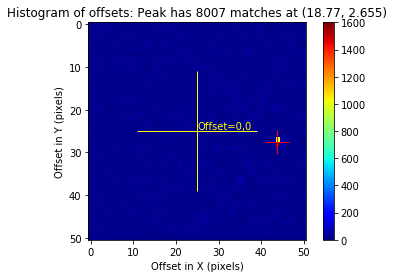

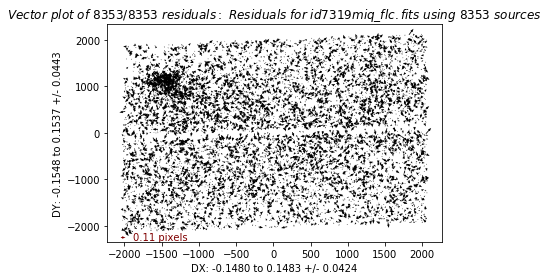

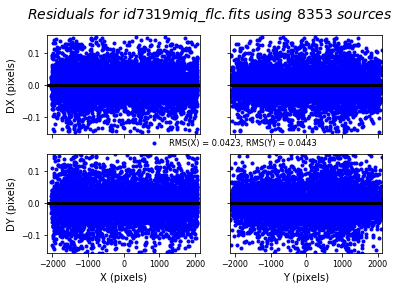

In [63]:
align_images(input_images, searchrad=1.0)

In [64]:
cat shifts.txt

# frame: output
# refimage: shifts_wcs.fits[wcs]
# form: delta
# units: pixels
id7307xfq_flc.fits    0.000000  0.000000    0.000000     1.000000   0.000000  0.000000
id7307xhq_flc.fits    -0.000777  -0.000933    359.999987     1.000000   0.042405  0.043754
id7307xlq_flc.fits    0.000026  0.000025    0.000009     1.000000   0.041745  0.044123
id7307xpq_flc.fits    0.000442  -0.000700    359.999981     1.000000   0.037709  0.041986
id7307xtq_flc.fits    -0.000343  0.000816    0.000013     0.999999   0.041598  0.042327
id7307xwq_flc.fits    0.000827  -0.001096    0.000019     1.000000   0.043765  0.044533
id7307y0q_flc.fits    0.000417  -0.000869    0.000000     0.999999   0.044082  0.043911
id7307y4q_flc.fits    -0.001576  -0.000969    359.999996     1.000000   0.044379  0.045101
id7319lbq_flc.fits    19.343408  3.155455    359.995357     0.999992   0.044988  0.043711
id7319lfq_flc.fits    19.395117  3.127270    359.995445     0.999992   0.045090  0.045378
id7319ljq_flc.fits    19.467247

### See options for final collation of the table

In [4]:
make_final_table?

In [67]:
i_ims, v_ims = [], []
for im in input_images:
    filt = fits.getval(im, 'filter')
    if filt == 'F814W':
        i_ims.append(im)
    elif filt == 'F555W':
        v_ims.append(im)

In [70]:
tbl_i, mag_i = make_final_table(i_ims, min_detections=3)

The output WCS is the following: 
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 80.524159056866765  -67.94281038805201  
CRPIX : 2078.0  2232.0  
CD1_1 CD1_2  : 1.0380442337323636e-05  3.6563199096051362e-06  
CD2_1 CD2_2  : 3.6563199096051362e-06  -1.0380442337323636e-05  
NAXIS : 4156  4464

Matching stars from input images with peaks in peakmap
N matched: 4166
N matched: 4864
N matched: 4359
N matched: 5005
N matched: 4441
N matched: 5082
N matched: 3852
N matched: 4243
N matched: 3145
N matched: 3468
N matched: 3150
N matched: 3464
N matched: 3146
N matched: 3464

Final step: collating properties of matched stars
Clipping the fit quality
Rejected 0 measurements


(0, 0.2)

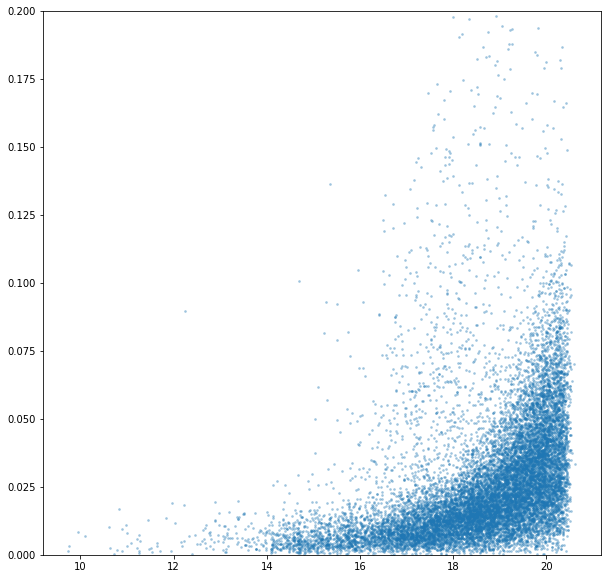

In [76]:
fig = plt.figure(figsize=(10,10))
plt.scatter(tbl_i['mbar'], tbl_i['mstd'], s=3, alpha=.3)
plt.ylim(0,.2)

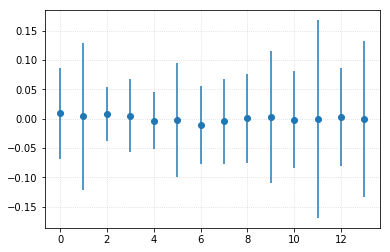

In [78]:
offsets = mag_i - np.array(tbl_i['mbar'])[:,None]
meds = np.nanmedian(offsets[tbl_i['mbar'] < 18], axis = 0)
spreads = np.nanstd(offsets[tbl_i['mbar'] < 18], axis = 0)
plt.errorbar(range(len(meds)), meds, yerr=spreads, fmt='o')
plt.grid(ls=':', alpha=.5)

In [79]:
spreads

array([ 0.07750533,  0.12508733,  0.04638941,  0.06239363,  0.04832058,
        0.09689018,  0.06657113,  0.07224861,  0.07534867,  0.11252151,
        0.08240678,  0.16812069,  0.08319996,  0.1328537 ])

/Users/vbajaj/anaconda2/envs/astroconda/lib/python2.7/site-packages/numpy/lib/function_base.py:583: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/vbajaj/anaconda2/envs/astroconda/lib/python2.7/site-packages/numpy/lib/function_base.py:584: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


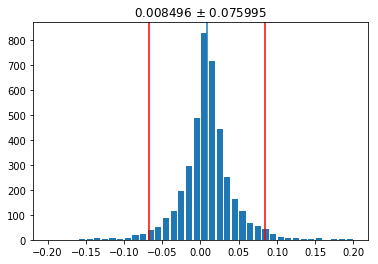

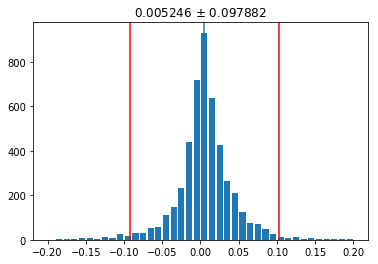

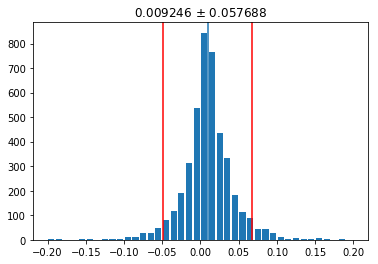

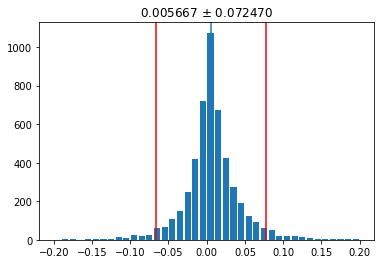

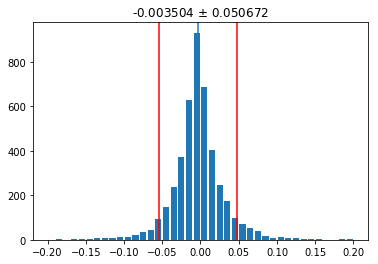

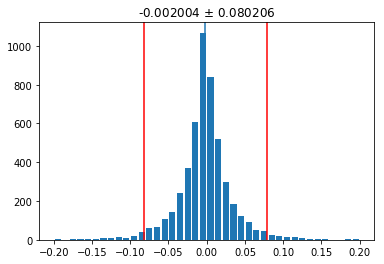

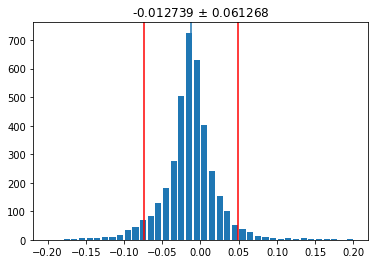

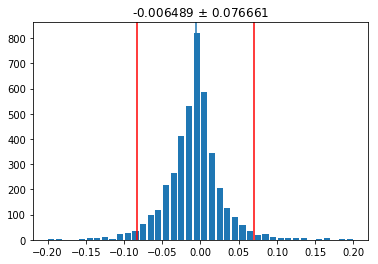

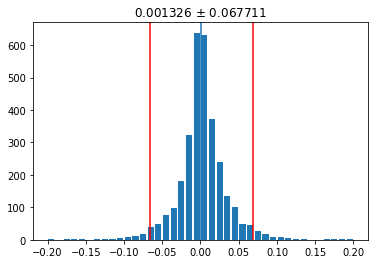

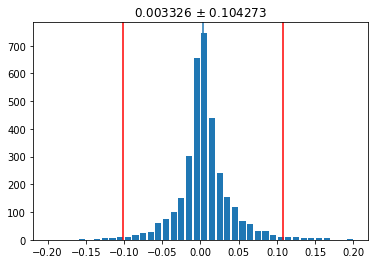

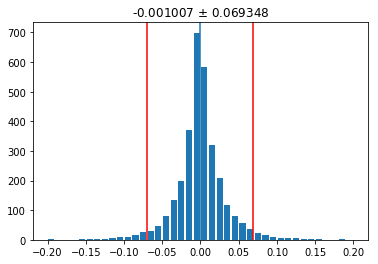

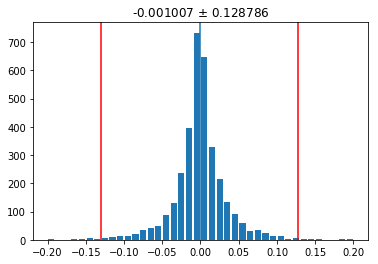

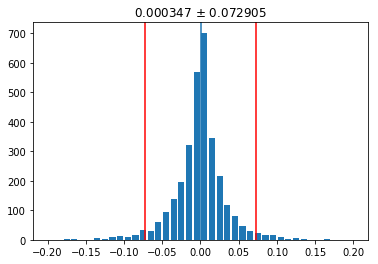

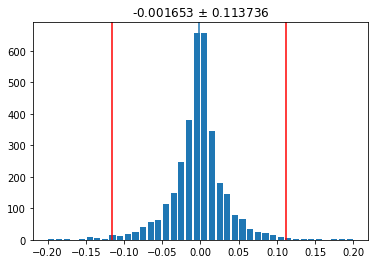

In [80]:
for i in range(offsets.shape[-1]):
    fig = plt.figure()
    plt.hist(offsets[:,i], range=(-.2,.2), bins=40, rwidth=.8)
    plt.title('{:1f} $\pm$ {:1f}'.format(np.nanmedian(offsets[:,i]), np.nanstd(offsets[:,i])))
    plt.axvline(np.nanmedian(offsets[:,i]))
    plt.axvline(np.nanmedian(offsets[:,i])+np.nanstd(offsets[:,i]), c='r')
    plt.axvline(np.nanmedian(offsets[:,i])-np.nanstd(offsets[:,i]), c='r')

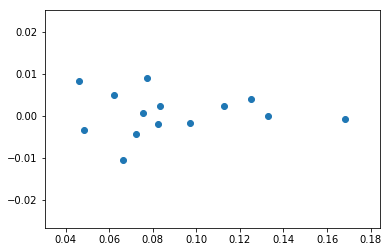

In [81]:
plt.scatter(spreads, meds)

In [104]:
meds

array([-0.00633333,  0.00133333, -0.00233333, -0.003     ,  0.0045    ,
        0.00241667,  0.0025    ,  0.0015    ,  0.00633333,  0.00466667,
        0.00441667, -0.001     , -0.00025   , -0.00433333,  0.006     ,
        0.00966667,  0.001     , -0.00033333, -0.00666667, -0.00866667])

<ErrorbarContainer object of 3 artists>

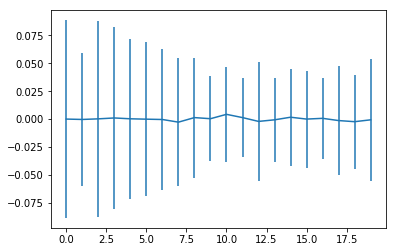

In [106]:
offsets2 = shifted - np.array(tbl['mbar'])[:,None]
meds2 = np.nanmedian(offsets2[tbl['mbar'] < -7], axis = 0)
spreads2 = np.nanstd(offsets2[tbl['mbar'] < -7], axis = 0)
plt.errorbar(range(len(meds)), meds2, yerr=spreads2)

In [68]:
plt.scatter(meds, meds/meds_all)

NameError: name 'meds_all' is not defined

In [69]:
np.nanmedian(tbl['mstd'] - shift_std)

0.00068296394019806868

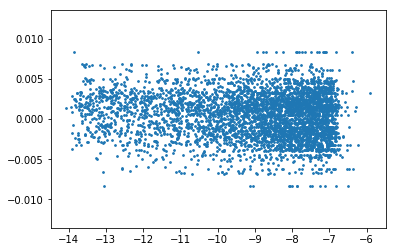

In [70]:
plt.scatter(tbl['mbar'], tbl['mstd'] - shift_std, s=3)

In [71]:
from scipy.stats import binned_statistic

(0, 0.2)

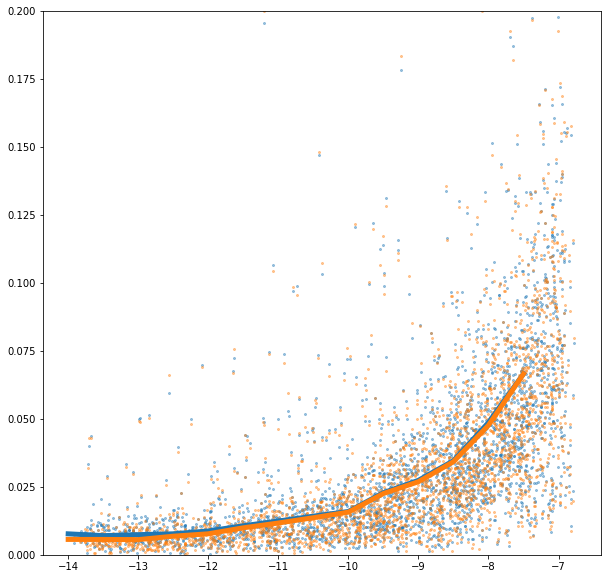

In [107]:
fig = plt.figure(figsize=(10,10))
plt.scatter(tbl['mbar'], tbl['mstd'], s=4, alpha=.4)
val1, bedges1, bn1 = binned_statistic(tbl['mbar'], tbl['mstd'], statistic=np.nanmedian, range=(-14,-7), bins=14)
plt.plot(bedges1[:-1], val1, lw=5)
plt.scatter(tbl['mbar'], shift_std, s=4, alpha=.4)
val2, bedges2, bn2 = binned_statistic(tbl['mbar'], shift_std, statistic=np.nanmedian, range=(-14,-7), bins=14)
plt.plot(bedges2[:-1], val2, lw=5)
plt.ylim(0,.2)

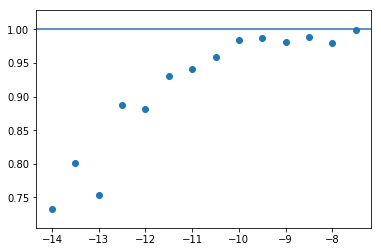

In [108]:
plt.scatter(bedges1[:-1], val2/val1)
plt.axhline(1)

In [109]:
i_tbl = Table.read('uvis_phot.txt', format='ascii.commented_header')

In [110]:
i_tbl

<Table length=5797>
     mbar           rbar          dbar      ...       ystd         n  
   float64        float64       float64     ...     float64      int64
-------------- ------------- -------------- ... ---------------- -----
-7.22066666667 156.029315169 -57.7846154349 ...   0.103364530568     9
-7.00833333333 156.031253858 -57.7820442725 ...  0.0718273201029     9
       -8.6278   156.0390209 -57.7716830498 ...  0.0105246180755     7
      -8.59725 156.043203584 -57.7663151383 ...  0.0573141791063     8
-13.5703333333 156.028853464 -57.7846536413 ... 0.00344378051644     9
       -7.5362 156.029272452  -57.784104077 ...   0.103419441766     7
-6.91233333333 156.047815875 -57.7601797381 ...   0.105642811567     9
      -13.5965 156.043390469  -57.765793535 ... 0.00774871023822     6
       -11.863 156.046432356 -57.7616803356 ... 0.00394780312183     6
       -10.794 156.054603696 -57.7510121117 ...  0.0091010412572     6
           ...           ...            ... ...              ...   ...
        -6.887 155.983024958 -57.7270948045 ...   0.093956517957     9
       -8.3748 155.974903243 -57.7374368447 ...  0.0456739071859     7
      -7.52225 155.961956236 -57.7539693717 ...  0.0440302584193     8
        -7.719 155.981485753 -57.7287218246 ...  0.0387566244157     7
       -8.8414 155.964181846 -57.7509560129 ...  0.0281197292664     7
       -7.2952 155.967102352 -57.7471543272 ...   0.090677998956     7
        -9.514 155.978079527 -57.7328544474 ...  0.0114502893107     6
      -7.41275 155.972960279 -57.7393603243 ...  0.0190120470413     8
        -7.325 155.975410206 -57.7362260713 ...  0.0532714223331     8
        -9.236 155.955099099 -57.7622826217 ...  0.0138919819518     6

In [82]:
from astropy.coordinates import SkyCoord, match_coordinates_sky

In [83]:
ic = SkyCoord(tbl_i['rbar'], tbl_i['dbar'], unit='deg')
vc = SkyCoord(tbl_v['rbar'], tbl_v['dbar'], unit='deg')

In [84]:
idx, ang, wat = ic.match_to_catalog_sky(vc)

In [85]:
dist = ang.arcsec > .05

In [86]:
sum(dist)

4692

In [87]:
len(vc)

16022

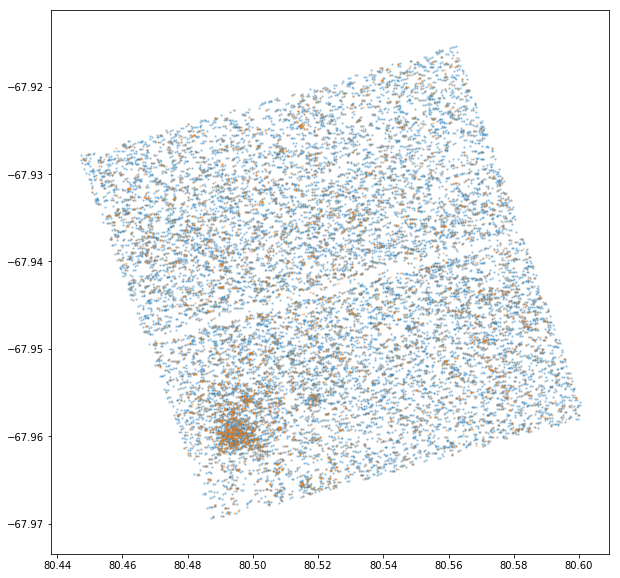

In [88]:
fig = plt.figure(figsize=(10,10))
plt.scatter(ic.ra.deg, ic.dec.deg, s=2, alpha=.3)
plt.scatter(vc.ra.deg[idx][dist], vc.dec.deg[idx][dist], s=2, alpha=.3)

In [89]:
matched_v = tbl_v['mbar'][idx]

(0, 0.3)

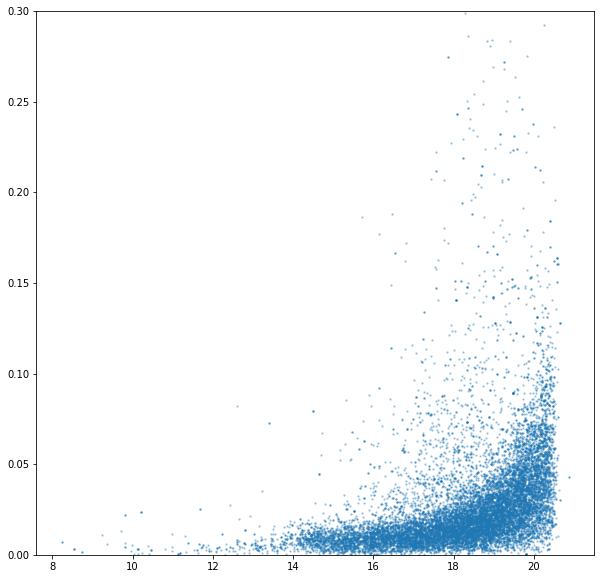

In [91]:
fig = plt.figure(figsize=(10,10))
plt.scatter(matched_v, tbl_v['mstd'][idx], s=2, alpha=.3)
plt.ylim(0,.3)

(0, 0.3)

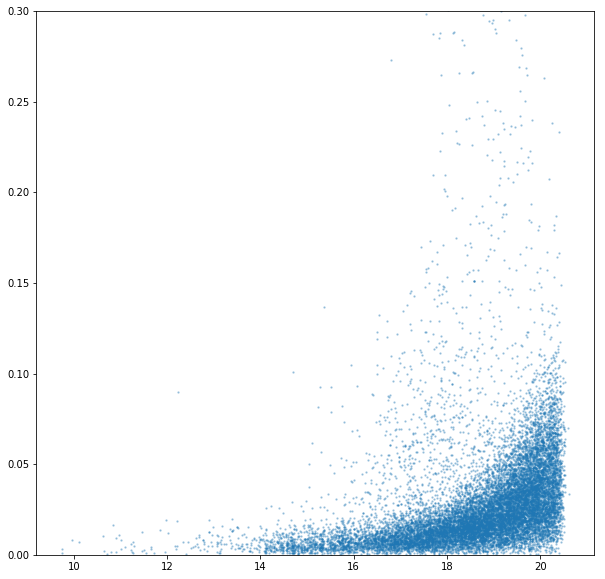

In [94]:
fig = plt.figure(figsize=(10,10))
plt.scatter(tbl_i['mbar'], tbl_i['mstd'], s=2, alpha=.3)
plt.ylim(0,.3)

In [117]:
tbl_i[dist].write('unmatched.txt', format='ascii.commented_header')

In [95]:
matched_v[dist] = np.nan

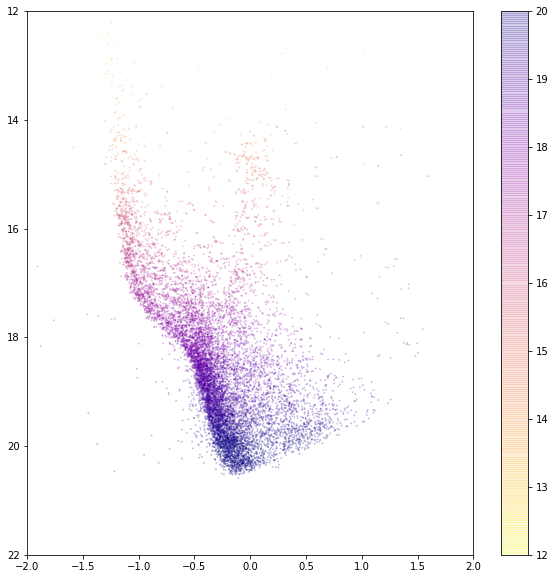

In [109]:
fig = plt.figure(figsize=(10,10))
plt.scatter(matched_v - tbl_i['mbar'], tbl_i['mbar'],s=1, alpha=.2, c=tbl_i['mbar'], cmap='plasma_r', vmin=12, vmax=20)
plt.xlim(-2,2)
plt.ylim(22,12)
plt.colorbar()

### See the results!
The columns are mbar, rbar, dbar, qbar, xbar, and ybar which are mean magnitude (instrumental), RA, Dec, Q (fit quality), X position in the output frame, and Y position in the output frame.  The columns ending in 'std' are the standard deviations of the values.  The last column 'n' is the number of times that source was detected (and not clipped out from the averaging).

In [30]:
tbl['mbar'] + 21.1

<Column name='mbar' dtype='float64' length=2973>
11.9696666667
8.02066666667
10.1756666667
13.9136666667
11.4243333333
        10.48
11.4086666667
13.7896666667
8.71866666667
9.23166666667
       11.524
13.6573333333
          ...
10.2886666667
       13.566
13.7686666667
9.96866666667
10.7056666667
12.6013333333
       12.684
12.6073333333
        9.091
13.7093333333
       10.863
7.42433333333

In [118]:
tbl_i

<Table length=16547>
     mbar          rbar          dbar      ...       ystd         n  
   float64       float64       float64     ...     float64      int64
------------- ------------- -------------- ... ---------------- -----
19.8535855774 80.4476277211 -67.9286937167 ...  0.0194774030645    10
 19.739088972 80.4483646145 -67.9294762102 ...  0.0342128195275    11
17.9647556387  80.450730548 -67.9320064774 ...  0.0417889597146    11
16.6474152786 80.4517086985 -67.9330376844 ... 0.00416700090796    11
19.0950819452 80.4520161076 -67.9333680943 ... 0.00623054537865    11
19.4483355774 80.4473993629 -67.9283509779 ...  0.0171442128207    10
16.9593355774 80.4541237638  -67.935478605 ...  0.0103533138979    10
18.8757556387 80.4489078602 -67.9298676419 ...  0.0740912974096    11
17.9438355774 80.4496038115 -67.9305986937 ...  0.0105201953486    10
14.5754223054 80.4511485019 -67.9322770085 ...  0.0522797035069    11
          ...           ...            ... ...              ...   ...
20.0715855774 80.5840753612 -67.9385400897 ...  0.0528723151374    10
17.8284201214 80.5849389753  -67.939466652 ... 0.00491274492888    11
 18.125088972 80.5623357828 -67.9153818594 ...  0.0390414100023    11
19.5330855774 80.5654456767 -67.9186813646 ...  0.0201894925499    10
20.0457486119 80.5732994447 -67.9270404306 ...  0.0139339158317    11
18.8407534547 80.5734228484 -67.9271963175 ... 0.00430725584964    11
18.1200867881 80.5939382736 -67.9490082562 ... 0.00472862374469    11
17.1414201214  80.579733562 -67.9338274346 ...  0.0176655027568    11
18.8917534547 80.5769242799 -67.9308078742 ...   0.009620370803    11
19.7144201214 80.5790170661 -67.9330011033 ...  0.0530183908034    11

### To access a column from the table, the syntax is `tbl[<colname>]` as seen below

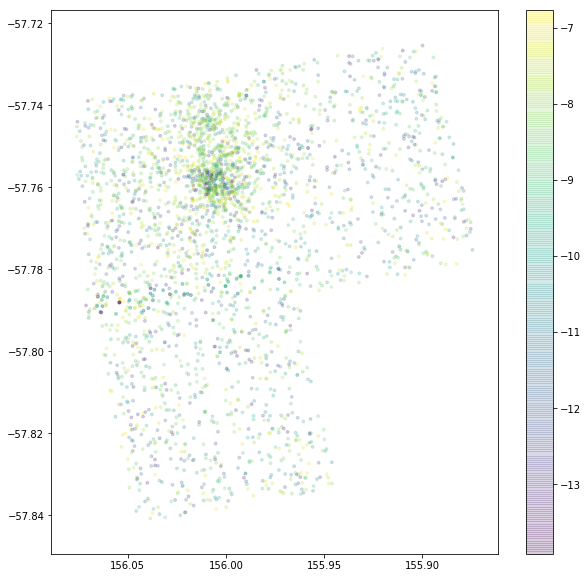

In [137]:
fig = plt.figure(figsize=(10,10))
plt.scatter(tbl['rbar'], tbl['dbar'], c=tbl['mbar'], s = 8, alpha=.2)
plt.xlim(plt.xlim()[::-1])
plt.colorbar()

(0, 0.1)

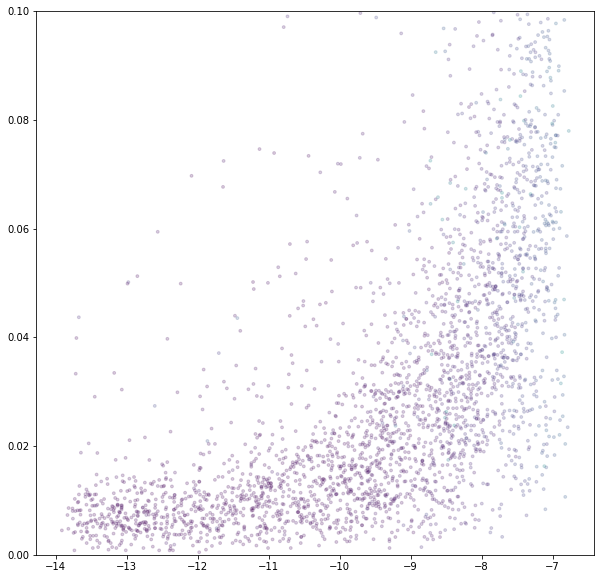

In [138]:
fig = plt.figure(figsize=(10,10))
plt.scatter(tbl['mbar'], tbl['mstd'], c=tbl['qbar'], s = 8, alpha=.2)
plt.ylim(0,.1)

(0, 0.1)

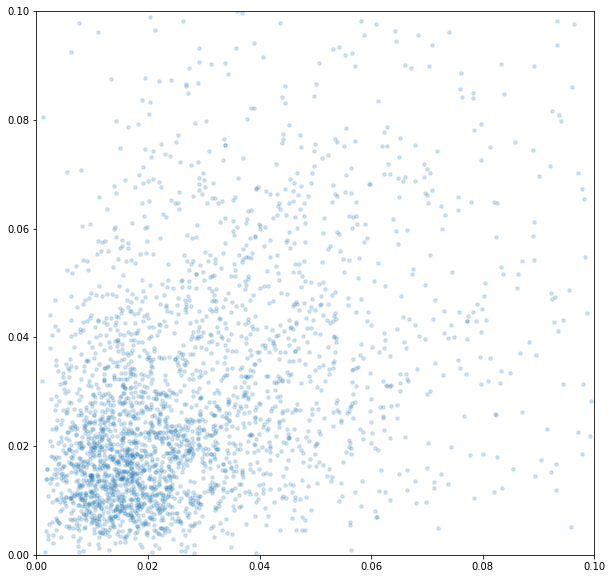

In [139]:
fig = plt.figure(figsize=(10,10))
plt.scatter(tbl['xstd'], tbl['ystd'], s = 12, alpha=.2)
plt.xlim(0,.1)
plt.ylim(0,.1)

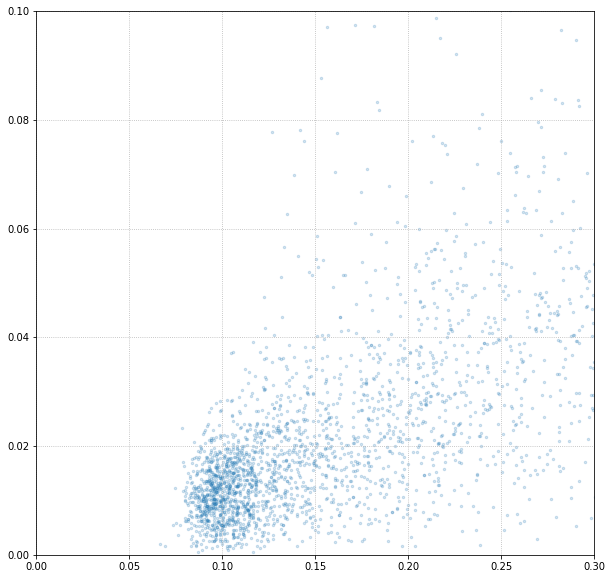

In [140]:
fig = plt.figure(figsize=(10,10))
plt.scatter(tbl['qbar'], tbl['qstd'], s = 6, alpha=.2)
plt.ylim(0,.1)
plt.xlim(0,.3)
plt.grid(ls=':')

(0, 0.1)

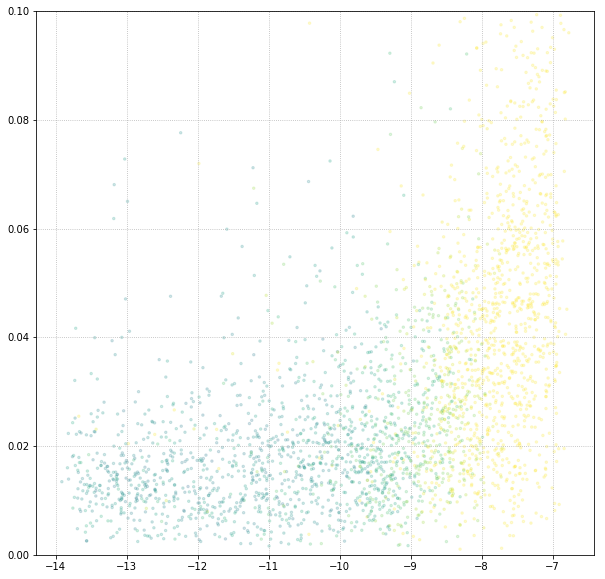

In [141]:
# stat, bedges, bn = binned_statistic(tbl['mbar'], tbl['xstd'],statistic=np.nanmedian, bins=20)
fig = plt.figure(figsize=(10,10))
plt.scatter(tbl['mbar'], tbl['xstd'], s = 6, alpha=.2, c=tbl['qbar'], vmin=0, vmax=.2)
# plt.scatter(bedges[1:], stat)
plt.grid(ls=':')
plt.ylim(0,.1)

(array([ 106.,  291.,  397.,  402.,  351.,  232.,  167.,  143.,  119.,
         100.,   85.,   64.,   63.,   61.,   44.,   44.,   36.,   34.,
          22.,   23.,   23.,   17.,   12.,   15.,   13.]),
 array([ 0.   ,  0.004,  0.008,  0.012,  0.016,  0.02 ,  0.024,  0.028,
         0.032,  0.036,  0.04 ,  0.044,  0.048,  0.052,  0.056,  0.06 ,
         0.064,  0.068,  0.072,  0.076,  0.08 ,  0.084,  0.088,  0.092,
         0.096,  0.1  ]),
 <a list of 25 Patch objects>)

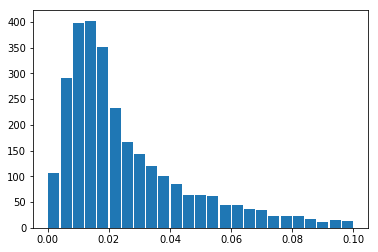

In [142]:
plt.hist(tbl['qstd'],rwidth=.9, bins=25, range=(0,.1))

In [119]:
from astropy.stats import sigma_clip

In [120]:
from photometry_tools import phot_wrapper

In [187]:
def ap_phot_image(tbl, image):
    rd = np.array([tbl['rbar'], tbl['dbar']])
    data = fits.getdata(image)
    w = WCS(fits.getheader(image, 1))
    xy = w.all_world2pix(rd.T, 1)
    radius=5.
    ann = 9.
    dann = 1.
    ap_phot = phot_wrapper.photometry(data, coords=xy, radius=radius, annulus=ann, dannulus=dann, origin=1.)
    return ap_phot

In [188]:
ap_phot_tbl_i = ap_phot_image(tbl_i, 'F814W_n44_WFC3_UVIS_drc.fits')
ap_phot_tbl_v = ap_phot_image(tbl_i, 'F555W_n44_WFC3_UVIS_drc.fits')
ap_phot_tbl_v

<Table length=16547>
      X             Y             flux       ...       mag         mag_error   
   float64       float64        float64      ...     float64        float64    
------------- ------------- ---------------- ... --------------- --------------
31.0022787304 123.648436305   0.717108241243 ...  0.361038216038  1.43262051435
31.1622487051 183.411028655   0.263824380732 ...   1.44671268149  2.13551540267
31.2394119235 376.506353274   0.240582049567 ...   1.54684194898  2.34786690314
31.6220804061 455.326084369    56.7753662173 ...  -4.38539986056 0.144100108111
31.5910293075 480.526950223    8.13822573574 ...  -2.27632433005  0.38092706115
33.3419663294 98.3174162952   0.568221428329 ...  0.613705981313  5.66929256759
35.0637274629 642.788233458    72.3942805425 ...  -4.64926064108 0.129881049759
35.6995302801 214.870435894 -0.0813459262021 ...             nan            nan
36.0384780955 270.771083698    33.3037090952 ...  -3.80623151094 0.188150798116
35.4582324986 398.629380314    2.02654485654 ... -0.766890552681 0.775485098988
          ...           ...              ... ...             ...            ...
3276.86621099 2018.05052155    3.29190109759 ...  -1.29361694681 0.598896909289
3276.66159942  2088.7325328    29.7350490199 ...  -3.68317164699 0.199124109145
3277.42615268 249.949729323  -0.634102973707 ...             nan            nan
3277.73750342 501.987346894    6.15256075283 ...  -1.97263977698 0.437868687279
 3277.7830581 1140.26468093    2.82501763557 ...  -1.12755290827 0.646532644972
3277.19413568 1151.95981867    10.4113582618 ...  -2.54376847775 0.336573215167
3277.14553753 2817.54169751    23.9253370968 ...  -3.44714516374  0.22198872667
3279.17085727 1659.00150191     70.333364731 ...  -4.61790348613 0.129472700517
3279.92502187 1428.69584751     8.9440310951 ...  -2.37883325107 0.363167064292
3280.71289997 1596.44761313    4.73778698565 ...  -1.68893882657 0.499099329442

Text(0,0.5,'V')

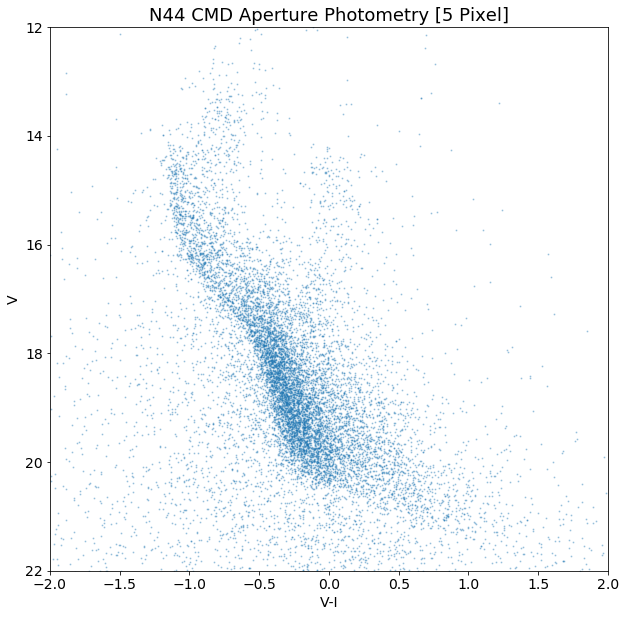

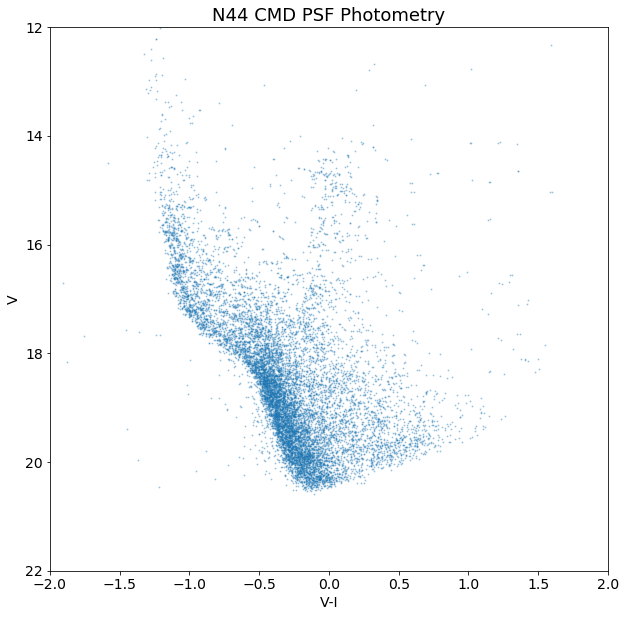

In [192]:
fig = plt.figure(figsize=(10,10))
plt.scatter(ap_phot_tbl_v['mag']-ap_phot_tbl_i['mag'], ap_phot_tbl_v['mag']+21.1, s=1, alpha=.3)#, c=ap_phot_tbl_i['mag']+21.1, cmap='plasma_r', vmin=12, vmax=20)
# plt.colorbar()
plt.ylim(plt.ylim()[::-1])
plt.ylim(22,12)
plt.xlim(-2,2)
plt.title('N44 CMD Aperture Photometry [5 Pixel]')
plt.xlabel('V-I')
plt.ylabel('V')

fig = plt.figure(figsize=(10,10))
plt.scatter(matched_v - tbl_i['mbar'], tbl_i['mbar'],s=1, alpha=.3)#, c=tbl_i['mbar'], cmap='plasma_r', vmin=12, vmax=20)
# plt.colorbar()
plt.xlim(-2,2)
plt.ylim(22,12)
plt.title('N44 CMD PSF Photometry')
plt.xlabel('V-I')
plt.ylabel('V')


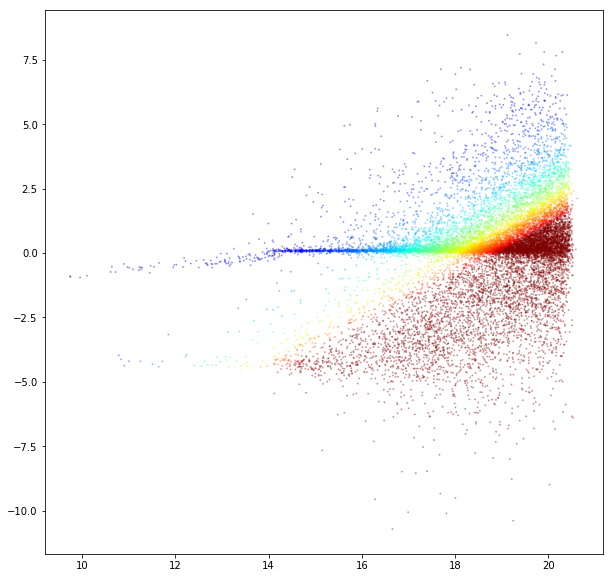

In [159]:
fig = plt.figure(figsize=(10,10))
plt.scatter(tbl_i['mbar'], tbl_i['mbar'] - ap_phot_tbl['mag'] - 21.1, s=1, alpha=.3, c=ap_phot_tbl['mag_error'], vmin=0., vmax=.41)
# plt.ylim(-1,1)

In [154]:
np.nanstd(ap_corr[mask])

2.0221090037263454

In [155]:
np.nanmedian(ap_corr[mask])

0.070696176938886524

(array([  13.,   14.,   17.,   47.,  100.,  971.,  711.,  244.,  131.,   81.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

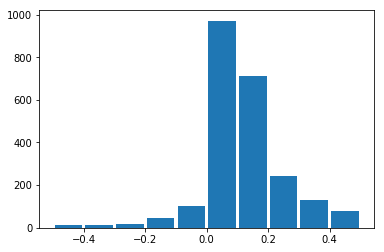

In [153]:
ap_corr = tbl_i['mbar'] - ap_phot_tbl['mag'] - 21.1
mask = np.logical_and(tbl_i['mbar'] < 18., tbl_i['mbar'] > 14.)
plt.hist(ap_corr[mask], range=(-.5,.5), rwidth=.9)

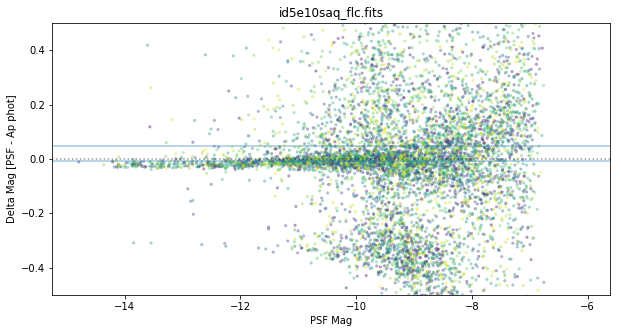

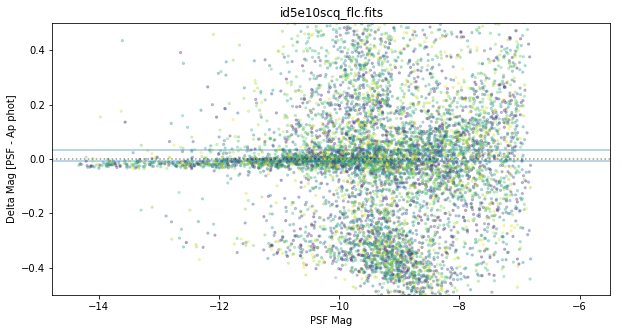

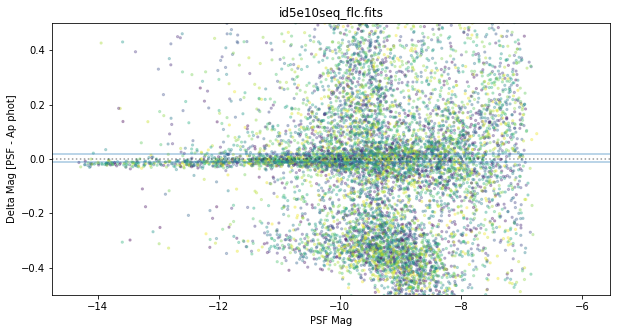

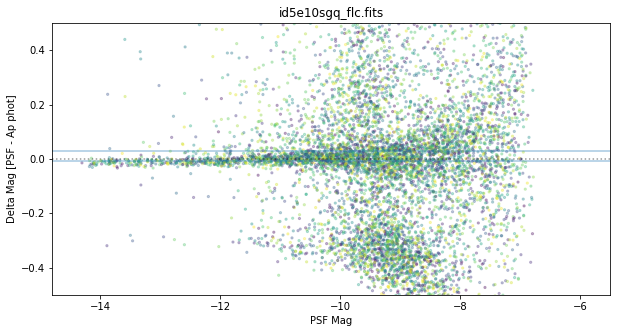

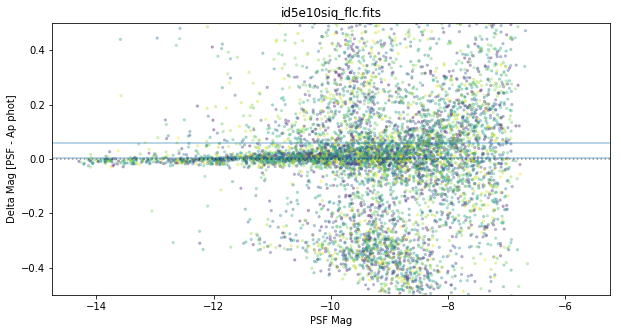

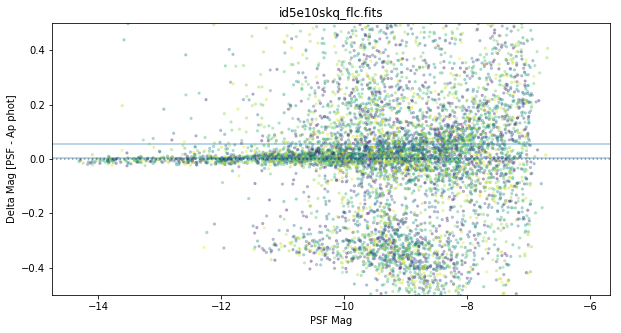

In [107]:
for im in input_images:
    term = im.replace('.fits', '')+'*.cat'
    cats = sorted(glob.glob(term))
    fig = plt.figure(figsize=(10,5))
    for i, ext in enumerate([1,2]):
        data = fits.getdata(im, 'sci', ext)
        radius=5.
        ann = 8.
        dann = 2.
        psf_tbl = Table.read(cats[i], format='ascii.commented_header')
        coords = np.array([psf_tbl['x'], psf_tbl['y']])
        ap_phot = phot_wrapper.photometry(data, coords=coords, radius=radius, annulus=ann, dannulus=dann, origin=1.)
        plt.scatter(psf_tbl['m'], psf_tbl['m'] - ap_phot['mag'], c=psf_tbl['y'], s=5, alpha=.3, cmap='viridis')
        clipped_deltas = sigma_clip(psf_tbl['m'] - ap_phot['mag'], sigma=3., iters=10)
        med = np.nanmedian(clipped_deltas[~clipped_deltas.mask])
        plt.axhline(med, alpha=.4)

    plt.ylim(-.5,.5)
    plt.axhline(0, ls=':', color='k', alpha=.4)
    plt.title('{}'.format(im))
    plt.xlabel('PSF Mag')
    plt.ylabel('Delta Mag [PSF - Ap phot]')
    

In [98]:
clipped_deltas = sigma_clip(psf_tbl['m'] - ap_phot['mag'], sigma=2.5, iters=10)


(array([    0.,     0.,     0.,     0.,    30.,   123.,   285.,   168.,
          177.,   662.,  1070.,   360.,   209.,   159.,   125.,    78.,
            0.,     0.,     0.,     0.]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 20 Patch objects>)

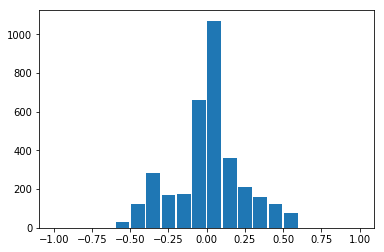

In [99]:
plt.hist(clipped_deltas[~clipped_deltas.mask], range=(-1,1), bins=20, rwidth=.9)

In [100]:
np.nanmedian(clipped_deltas[~clipped_deltas.mask])

0.013330698353279935

In [101]:
clipped_deltas.view()

masked_Column(data = [-0.04562842867743555 0.17128410940537897 0.12739557454737316 ...,
 -0.023318046448912 0.0471425883390193 -0.44866244541287337],
              mask = [False False False ..., False False False],
        fill_value = 1e+20)

In [108]:
derp = psf_tbl['m'] - ap_phot['mag']

In [109]:
np.nanmedian(derp[psf_tbl['m'] < -10.5])

0.00079038964759803321